# Problem 1:

**Data Ingestion: 11 marks**

**1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it. (4 Marks)**

In [1]:
import numpy as np   
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
from sklearn.metrics import roc_auc_score,plot_roc_curve

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

**Read Data**

In [2]:
data_df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

In [3]:
data_df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [4]:
data_df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


**Shape**

In [5]:
print("The no of rows:",data_df.shape[0])
print("The no of colums:",data_df.shape[1])

The no of rows: 1525
The no of colums: 10


**Data type of data features**

In [6]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


**Making different list for categorical columns and numerical columns**

In [7]:
data_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
print("The no of rows:",data_df.shape[0])
print("The no of colums:",data_df.shape[1])

The no of rows: 1525
The no of colums: 9


In [9]:
cat = []
con = []

for i in data_df.columns:
    if data_df[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)

print('The categorical attibutes are:', cat)
print('The continuous attributes are:', con)

The categorical attibutes are: ['vote', 'gender']
The continuous attributes are: ['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


**Summary Statistics for numerical and categorical columns**

In [10]:
data_df[con].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


**Categorical Values with their Counts**

In [11]:
for feature in data_df.columns:
    if data_df[feature].dtype=='object':
        print(feature.upper() ,":",data_df[feature].nunique())
        print(data_df[feature].value_counts().sort_values())
        print('\n')

VOTE : 2
Conservative     462
Labour          1063
Name: vote, dtype: int64


GENDER : 2
male      713
female    812
Name: gender, dtype: int64




**Check for Null Values**

In [12]:
data_df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

**Checking for Duplicate Records**

In [13]:
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


**Perform EDA (Check the null values, Data types, shape, Univariate, bivariate analysis). Also check for outliers. Interpret the inferences for each.**

**Drop the duplicate values**

In [14]:
data_df.drop_duplicates(inplace=True)
dups=data_df.duplicated()
print("Total no of duplicate values = %d" % (dups.sum()))
data_df[dups]

Total no of duplicate values = 0


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [15]:
print("The no of rows:",data_df.shape[0])
print("The no of colums:",data_df.shape[1])

The no of rows: 1517
The no of colums: 9


**construct box plot for Numerical variables**

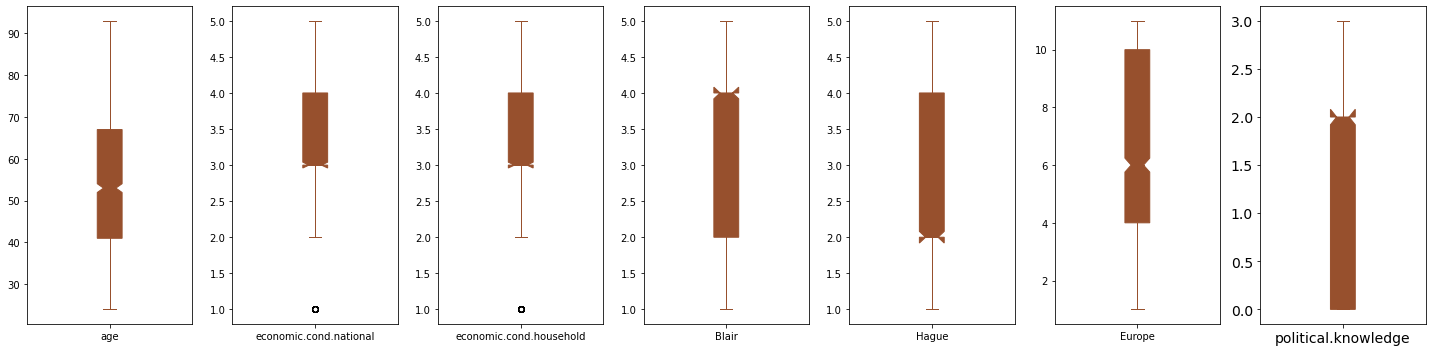

In [16]:
data_df[con].plot(kind = 'box', subplots = True, figsize = (20,5), color = '#97502d' , notch = True, patch_artist=True)

plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.tight_layout();

**Univariate Analysis**

In [17]:
data_df.vote.value_counts()

Labour          1057
Conservative     460
Name: vote, dtype: int64

Text(0, 0.5, 'Count')

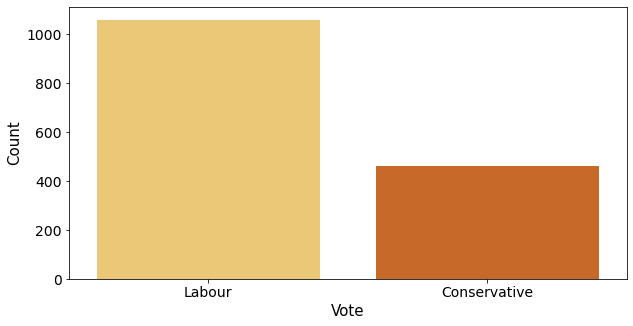

In [18]:
plt.figure(figsize = (10,5))
sns.countplot(data_df['vote'],palette='YlOrBr');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Vote', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

In [19]:
data_df.gender.value_counts()

female    808
male      709
Name: gender, dtype: int64

Text(0, 0.5, 'Count')

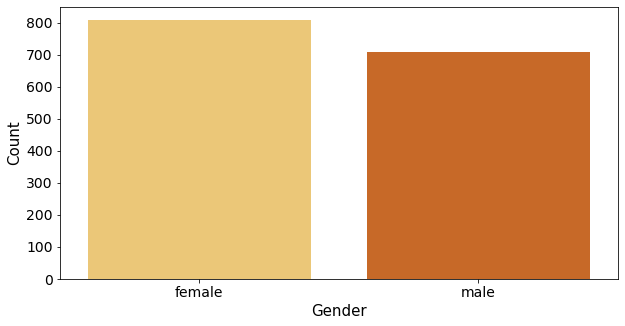

In [20]:
plt.figure(figsize = (10,5))
sns.countplot(data_df['gender'],palette='YlOrBr');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('Gender', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

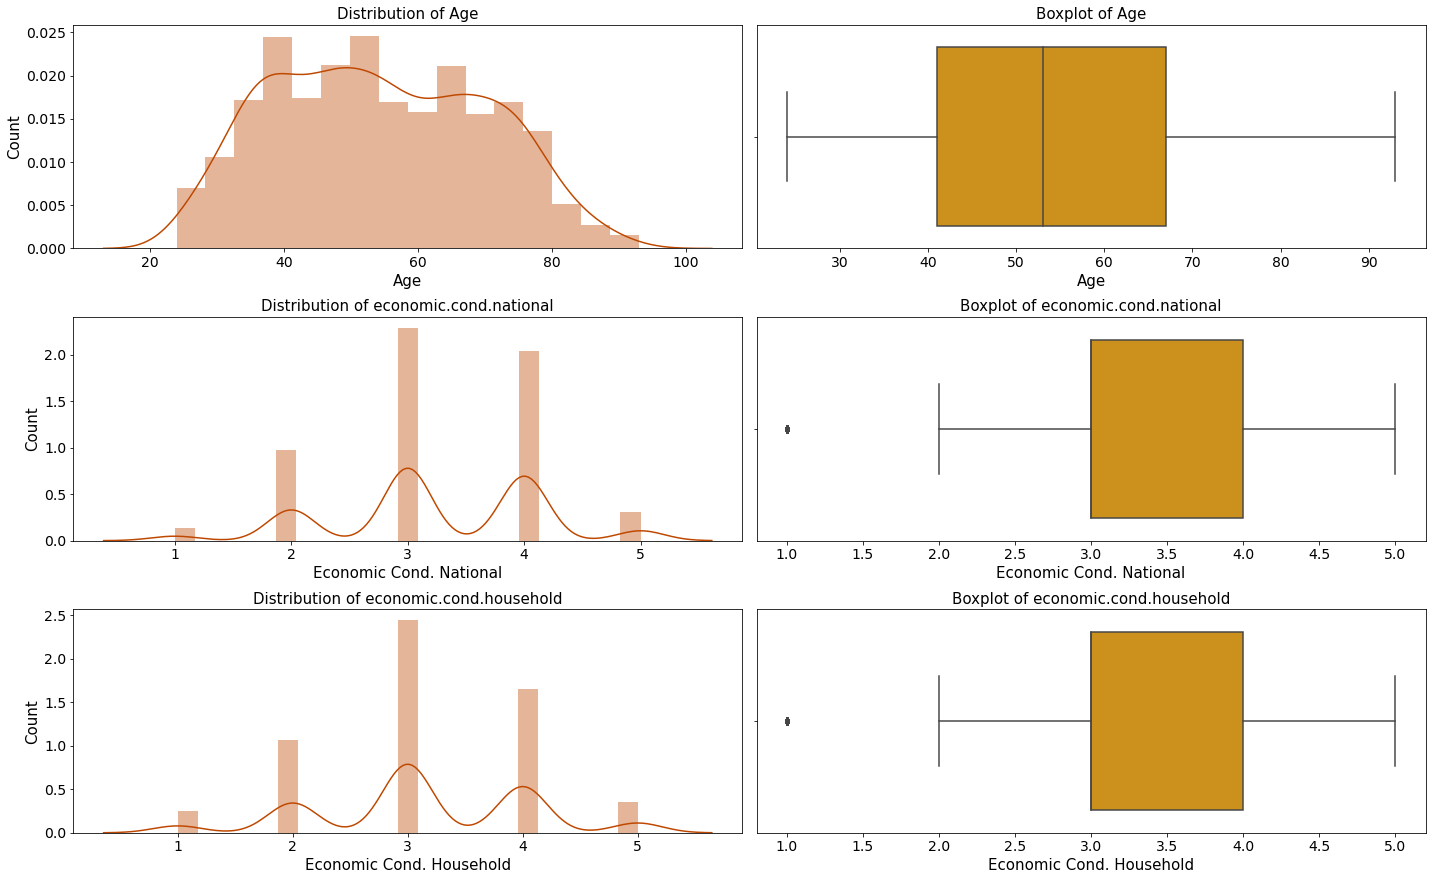

In [21]:
plt.figure(figsize = (20,28))

plt.subplot(7,2,1)
sns.distplot(data_df['age'],color = '#bf4800')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,2)
sns.boxplot(data_df['age'],color = '#e99900')
plt.title('Boxplot of Age', fontsize = 15)
plt.xlabel('Age', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,3)
sns.distplot(data_df['economic.cond.national'],color = '#bf4800')
plt.title('Distribution of economic.cond.national', fontsize = 15)
plt.xlabel('Economic Cond. National', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,4)
sns.boxplot(data_df['economic.cond.national'],color = '#e99900')
plt.title('Boxplot of economic.cond.national', fontsize = 15)
plt.xlabel('Economic Cond. National', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,5)
sns.distplot(data_df['economic.cond.household'],color = '#bf4800')
plt.title('Distribution of economic.cond.household', fontsize = 15)
plt.xlabel('Economic Cond. Household', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,6)
sns.boxplot(data_df['economic.cond.household'],color = '#e99900')
plt.title('Boxplot of economic.cond.household', fontsize = 15)
plt.xlabel('Economic Cond. Household', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.tight_layout()
plt.show()

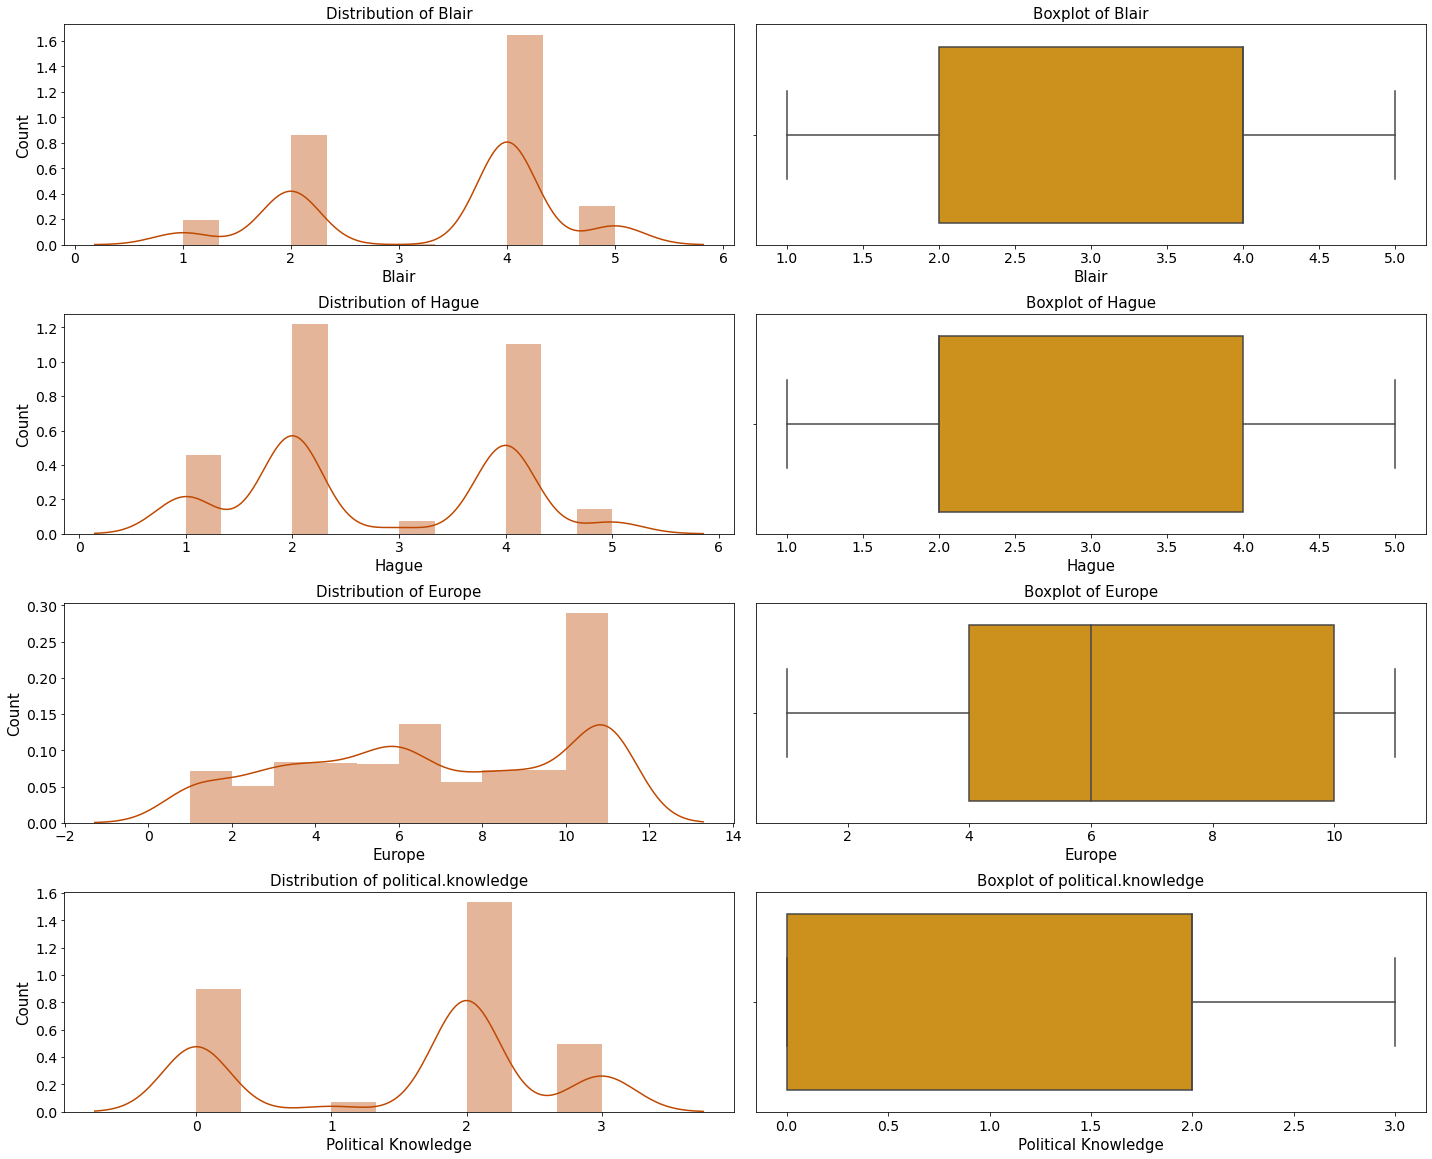

In [22]:
plt.figure(figsize = (20,28))

plt.subplot(7,2,7)
sns.distplot(data_df['Blair'], color = '#bf4800')
plt.title('Distribution of Blair', fontsize = 15)
plt.xlabel('Blair',fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,8)
sns.boxplot(data_df['Blair'],color = '#e99900')
plt.title('Boxplot of Blair', fontsize = 15)
plt.xlabel('Blair',fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,9)
sns.distplot(data_df['Hague'],color = '#bf4800')
plt.title('Distribution of Hague', fontsize = 15)
plt.xlabel('Hague', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,10)
sns.boxplot(data_df['Hague'],color = '#e99900')
plt.title('Boxplot of Hague', fontsize = 15)
plt.xlabel('Hague', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,11)
sns.distplot(data_df['Europe'],color = '#bf4800')
plt.title('Distribution of Europe', fontsize = 15)
plt.xlabel('Europe', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,12)
sns.boxplot(data_df['Europe'],color = '#e99900')
plt.title('Boxplot of Europe', fontsize = 15)
plt.xlabel('Europe', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,13)
sns.distplot(data_df['political.knowledge'],color = '#bf4800')
plt.title('Distribution of political.knowledge', fontsize = 15)
plt.xlabel('Political Knowledge', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(7,2,14)
sns.boxplot(data_df['political.knowledge'],color = '#e99900')
plt.title('Boxplot of political.knowledge', fontsize = 15)
plt.xlabel('Political Knowledge', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.tight_layout()
plt.show()

In [23]:
data_df.skew()

age                        0.139800
economic.cond.national    -0.238474
economic.cond.household   -0.144148
Blair                     -0.539514
Hague                      0.146191
Europe                    -0.141891
political.knowledge       -0.422928
dtype: float64

**Convert discrete values to ordinal values**

In [24]:
data_df['age_bins'] = pd.cut(x=data_df['age'], bins=[20, 29, 39, 49,59,69,79,89,99],labels=['20s', '30s', '40s','50s','60s','70s','80s','90s'])

In [25]:
data_df['age_bins'].unique().sort_values()

['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
Categories (8, object): ['20s' < '30s' < '40s' < '50s' < '60s' < '70s' < '80s' < '90s']

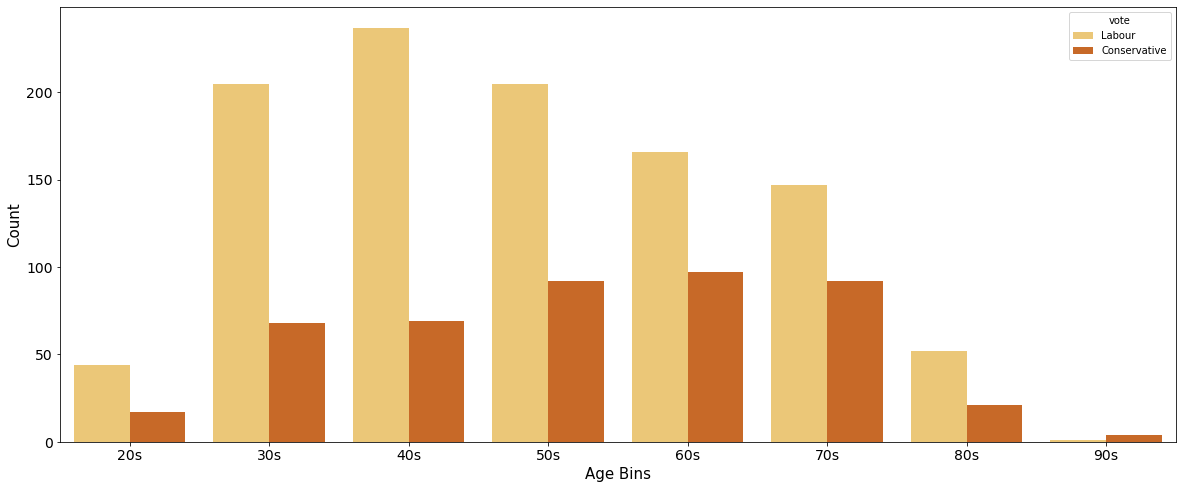

In [26]:
plt.figure(figsize = (20,8))
sns.countplot(x=data_df['age_bins'],data=data_df,palette='YlOrBr', hue='vote');
plt.xlabel('Age Bins', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

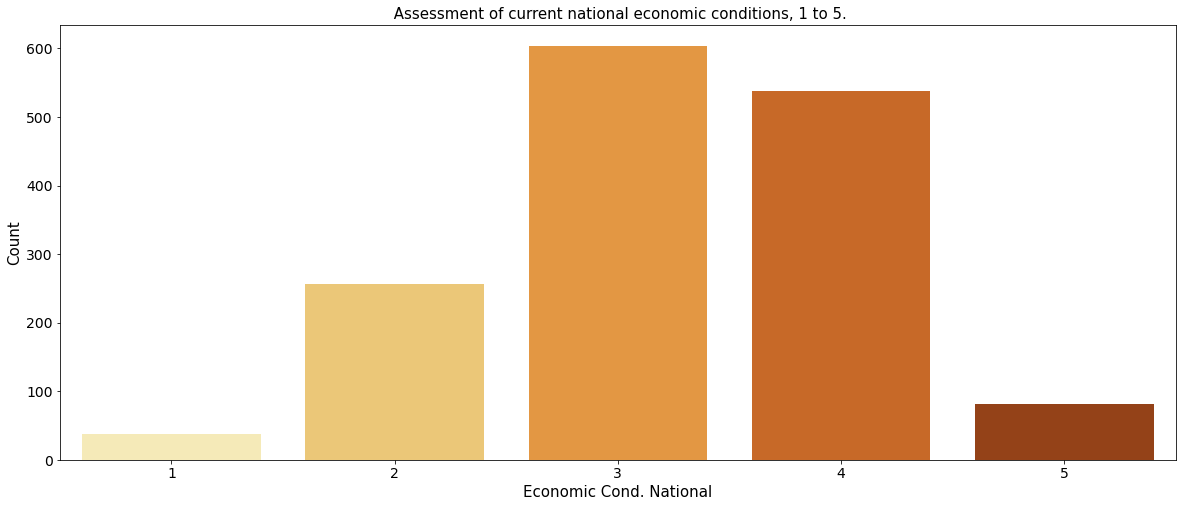

In [27]:
plt.figure(figsize = (20,8))
plt.title(' Assessment of current national economic conditions, 1 to 5.', fontsize = 15)
sns.countplot(data_df['economic.cond.national'],palette='YlOrBr');
plt.xlabel('Economic Cond. National', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

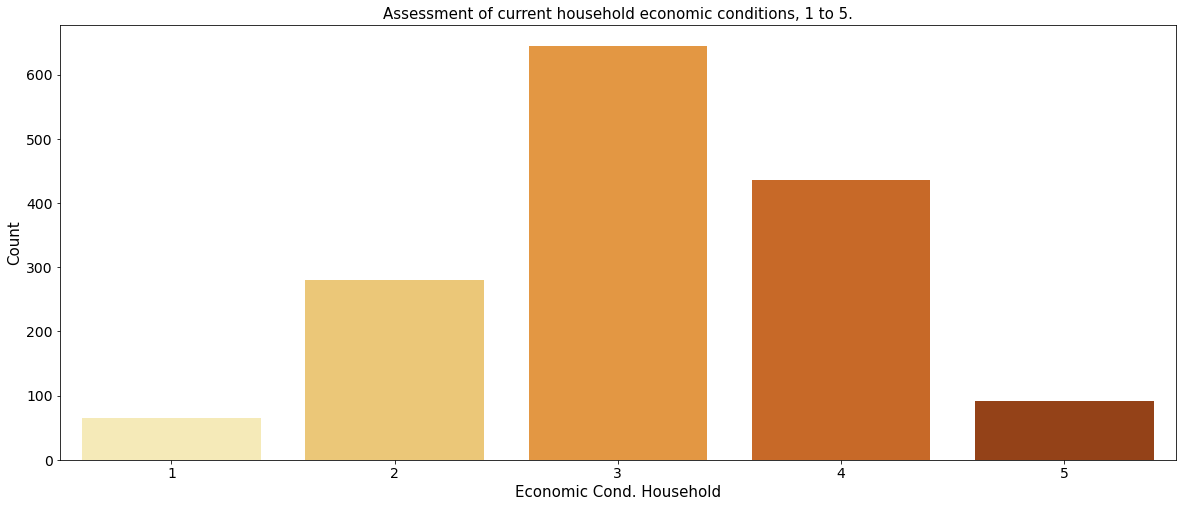

In [28]:
plt.figure(figsize = (20,8))
plt.title('Assessment of current household economic conditions, 1 to 5.', fontsize = 15)
sns.countplot(data_df['economic.cond.household'],palette='YlOrBr');
plt.xlabel('Economic Cond. Household', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

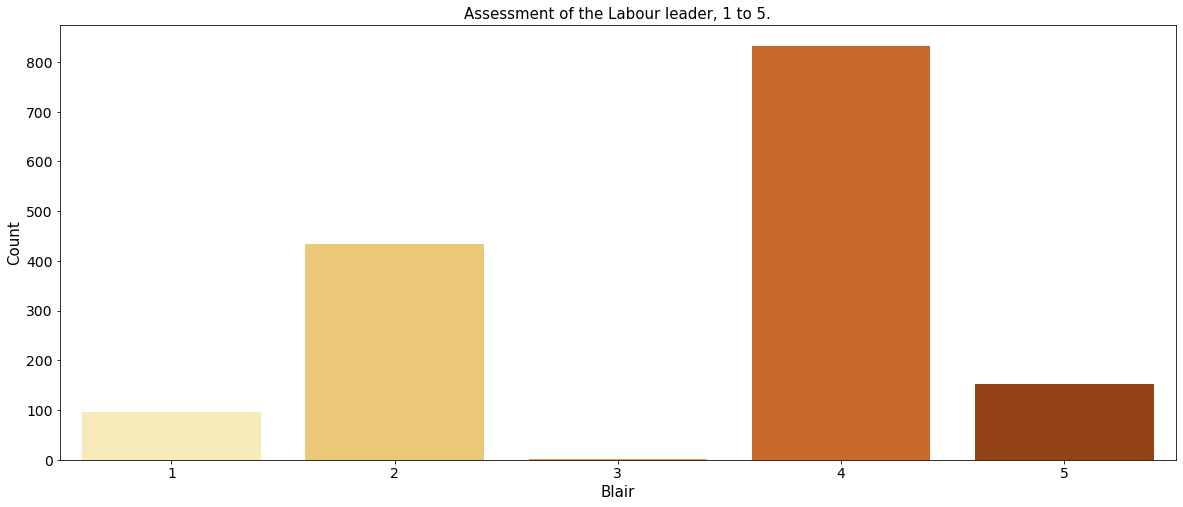

In [29]:
plt.figure(figsize = (20,8))
plt.title('Assessment of the Labour leader, 1 to 5.', fontsize = 15)
sns.countplot(data_df['Blair'],palette='YlOrBr');
plt.xlabel('Blair', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

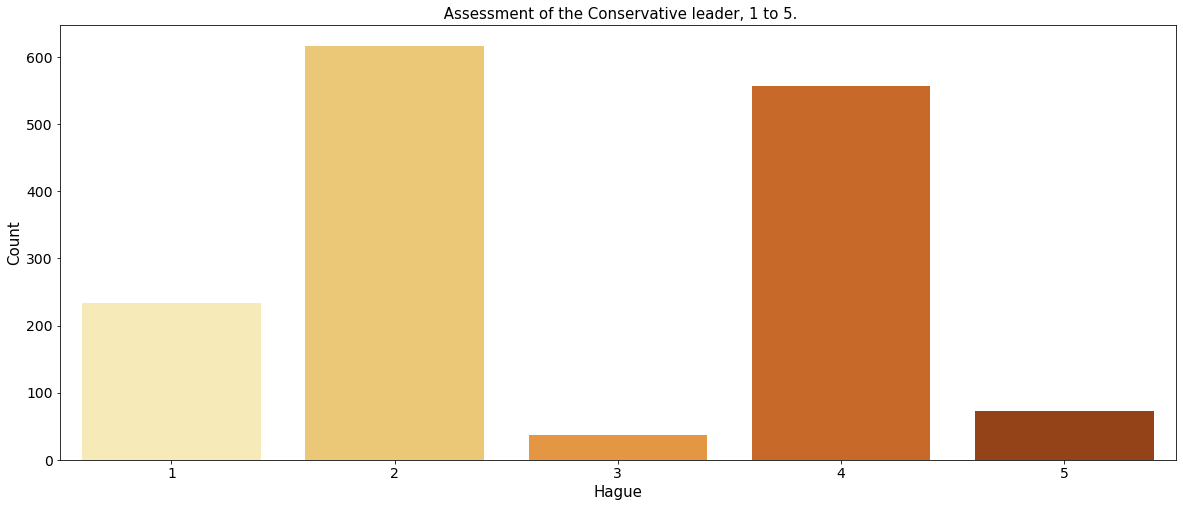

In [30]:
plt.figure(figsize = (20,8))
plt.title(' Assessment of the Conservative leader, 1 to 5.', fontsize = 15)
sns.countplot(data_df['Hague'],palette='YlOrBr');
plt.xlabel('Hague', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

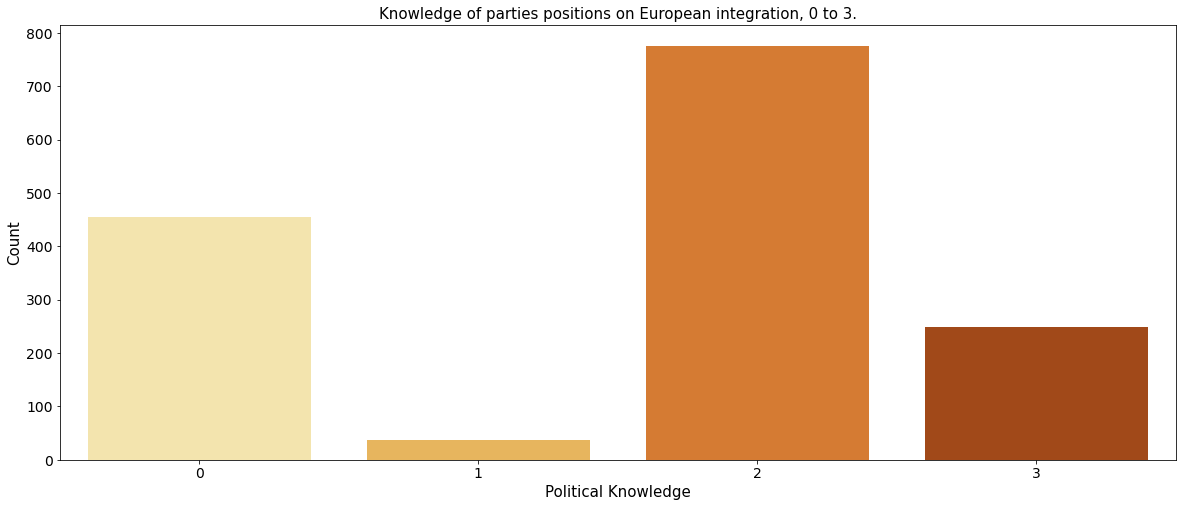

In [31]:
plt.figure(figsize = (20,8))
plt.title('Knowledge of parties positions on European integration, 0 to 3.', fontsize = 15)
sns.countplot(data_df['political.knowledge'],palette='YlOrBr');
plt.xlabel('Political Knowledge', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

**Bivariate and Multivariate Analysis**

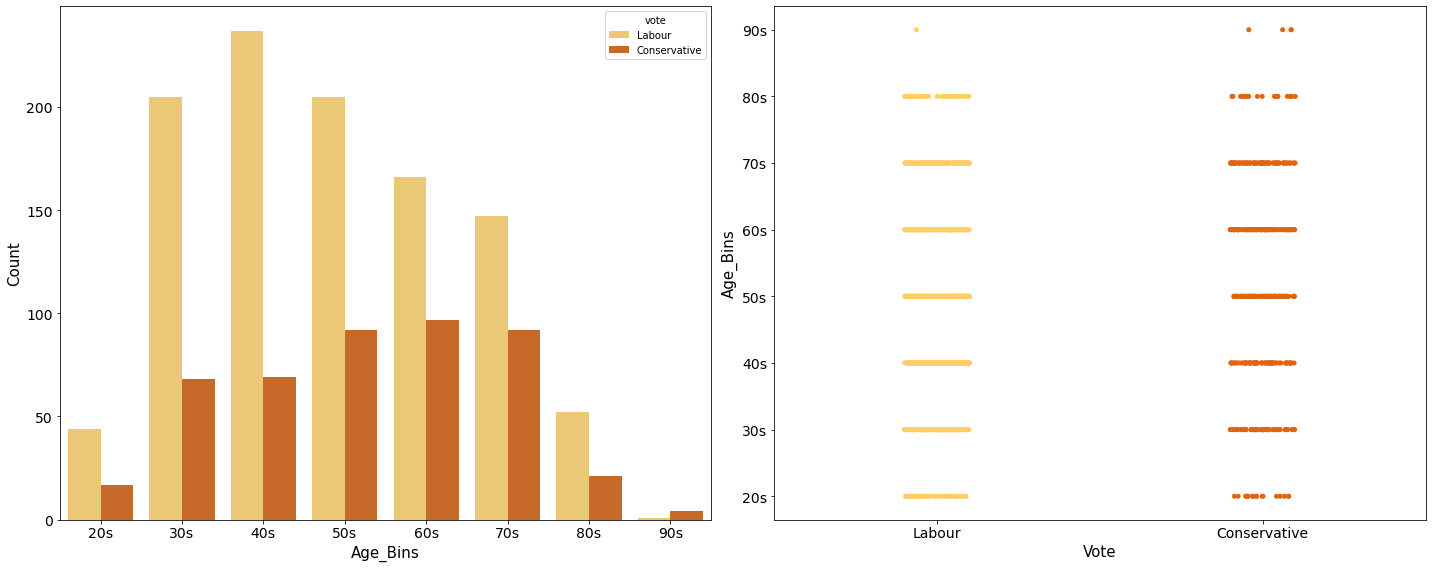

In [32]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
sns.countplot(x="age_bins", data=data_df, hue='vote',palette='YlOrBr');
plt.xlabel('Age_Bins', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);

plt.subplot(1,2,2)
sns.stripplot(data_df['vote'], data_df['age_bins'].sort_values(),palette='YlOrBr', jitter=True) 
plt.ylabel('Age_Bins', fontsize = 15);
plt.xlabel('Vote', fontsize = 15);
plt.xticks(fontsize = 14);
plt.yticks(fontsize = 14);
plt.tight_layout();

Labour Party is getting more votes in each age group

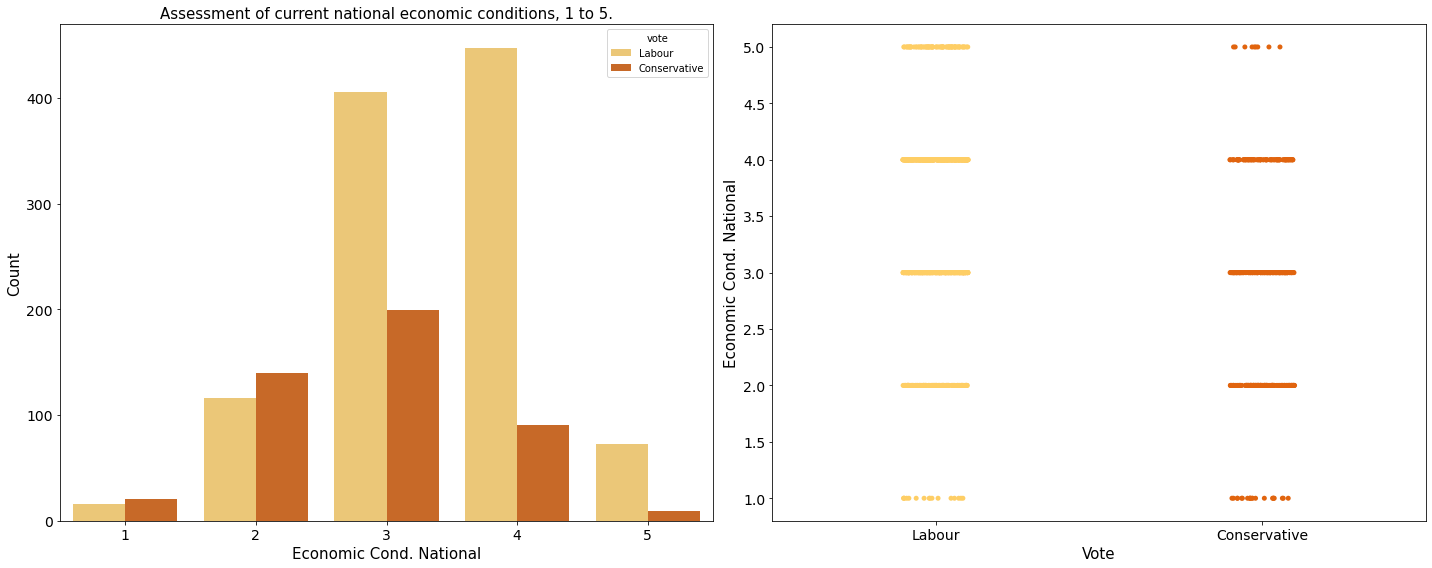

In [33]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('Assessment of current national economic conditions, 1 to 5.', fontsize = 15)
sns.countplot(x="economic.cond.national", data=data_df, hue='vote',palette='YlOrBr')
plt.xlabel('Economic Cond. National', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(1,2,2)
sns.stripplot(data_df['vote'], data_df['economic.cond.national'],palette='YlOrBr', jitter=True) 
plt.ylabel('Economic Cond. National', fontsize = 15);
plt.xlabel('Vote', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.tight_layout();

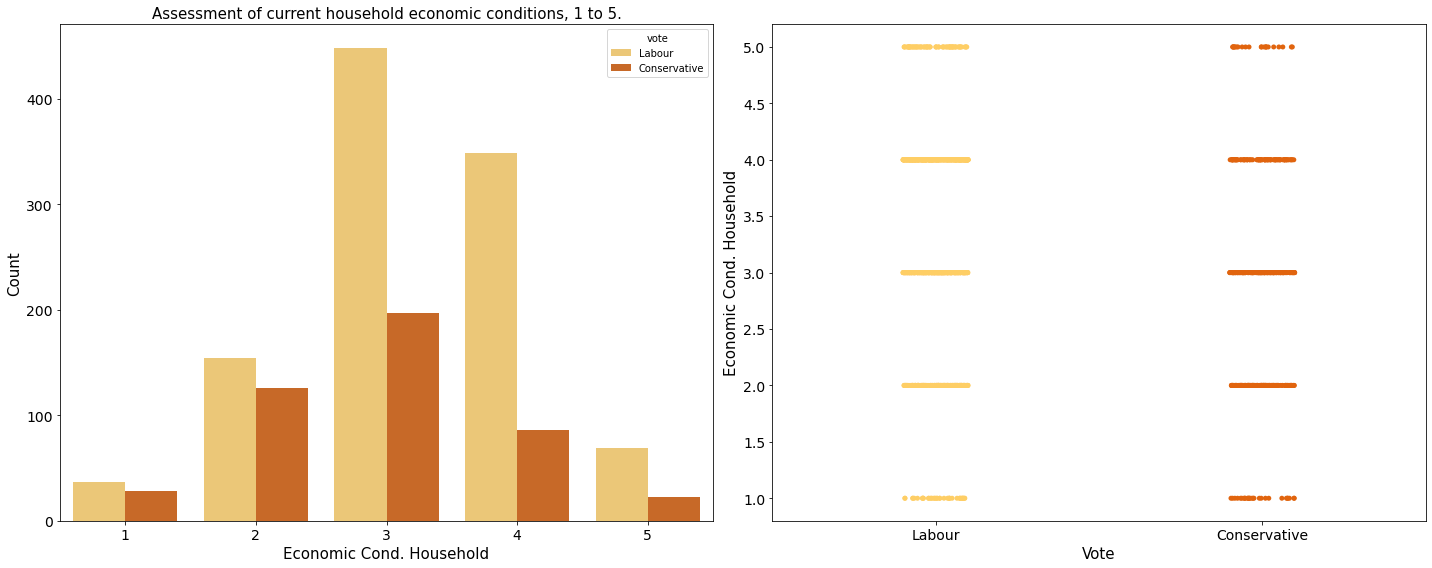

In [34]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('Assessment of current household economic conditions, 1 to 5.', fontsize = 15)
sns.countplot(x="economic.cond.household", data=data_df, hue='vote',palette='YlOrBr')
plt.xlabel('Economic Cond. Household', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(1,2,2)
sns.stripplot(data_df['vote'], data_df['economic.cond.household'],palette='YlOrBr', jitter=True) 
plt.ylabel('Economic Cond. Household', fontsize = 15);
plt.xlabel('Vote', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.tight_layout();

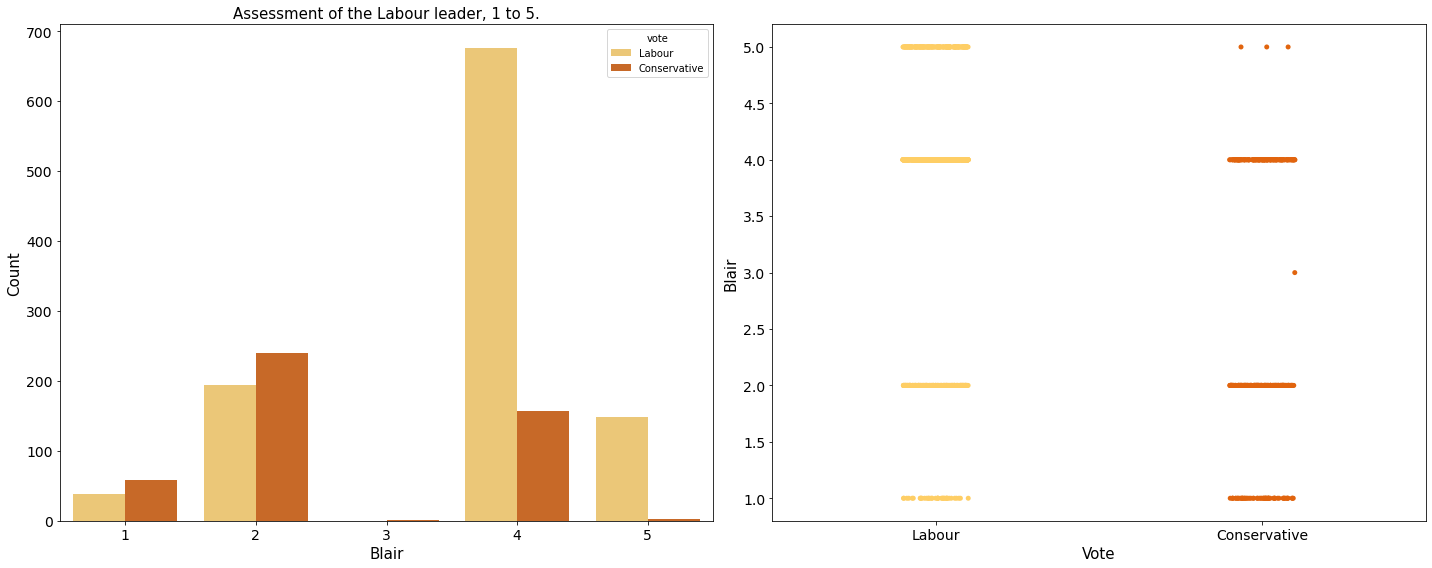

In [35]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('Assessment of the Labour leader, 1 to 5.', fontsize = 15)
sns.countplot(x="Blair", data=data_df, hue='vote',palette='YlOrBr')
plt.xlabel('Blair', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(1,2,2)
sns.stripplot(data_df['vote'], data_df['Blair'],palette='YlOrBr', jitter=True) 
plt.ylabel('Blair', fontsize = 15);
plt.xlabel('Vote', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.tight_layout();

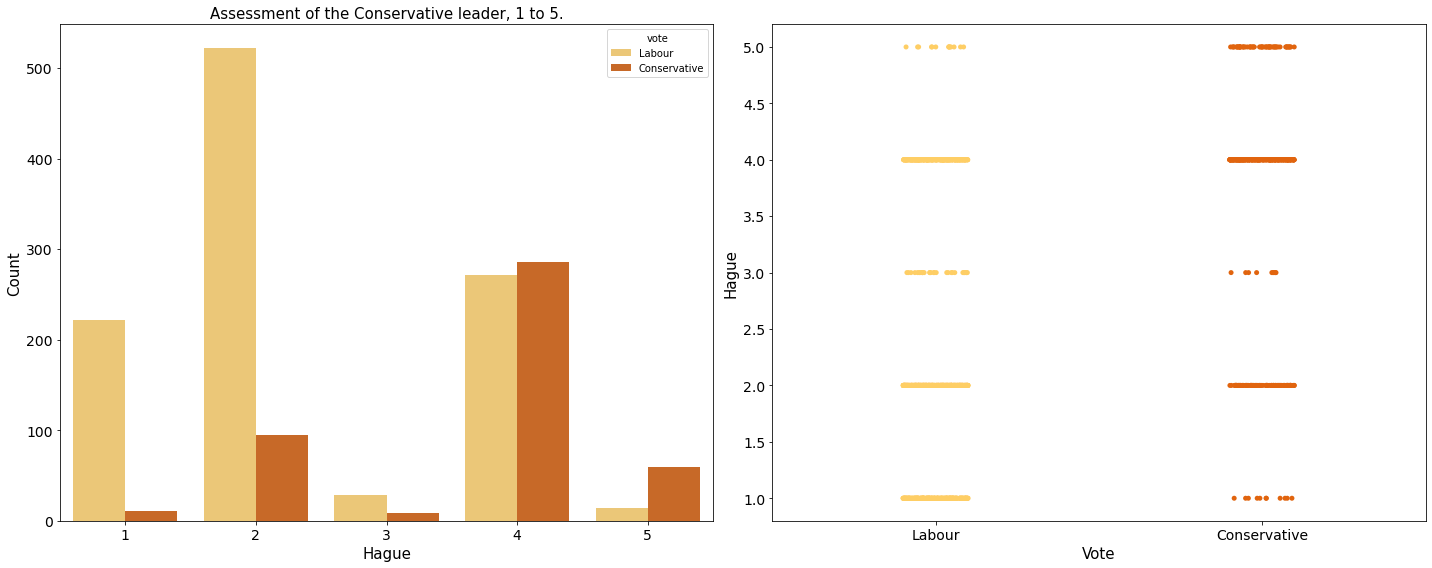

In [36]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('Assessment of the Conservative leader, 1 to 5.', fontsize = 15)
sns.countplot(x="Hague", data=data_df, hue='vote',palette='YlOrBr')
plt.xlabel('Hague', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(1,2,2)
sns.stripplot(data_df['vote'], data_df['Hague'],palette='YlOrBr', jitter=True) 
plt.ylabel('Hague', fontsize = 15);
plt.xlabel('Vote', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.tight_layout();

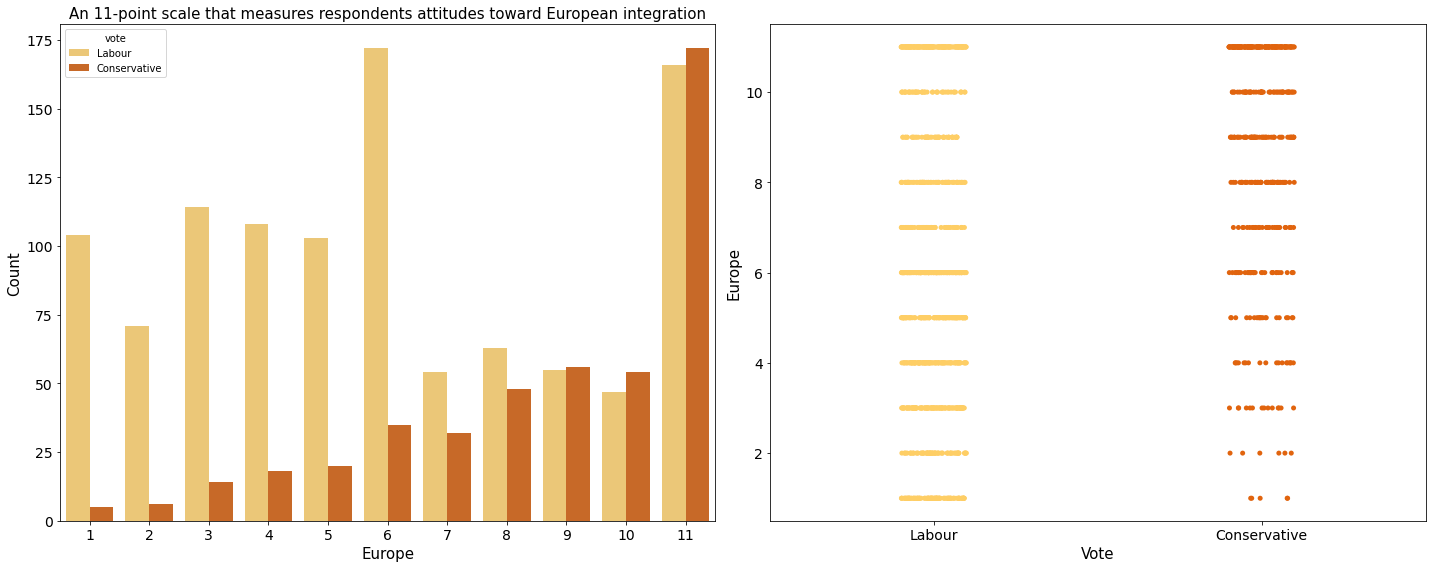

In [37]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('An 11-point scale that measures respondents attitudes toward European integration', fontsize = 15)
sns.countplot(x="Europe", data=data_df, hue='vote',palette='YlOrBr')
plt.xlabel('Europe', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(1,2,2)
sns.stripplot(data_df['vote'], data_df['Europe'],palette='YlOrBr', jitter=True) 
plt.ylabel('Europe', fontsize = 15);
plt.xlabel('Vote', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.tight_layout();

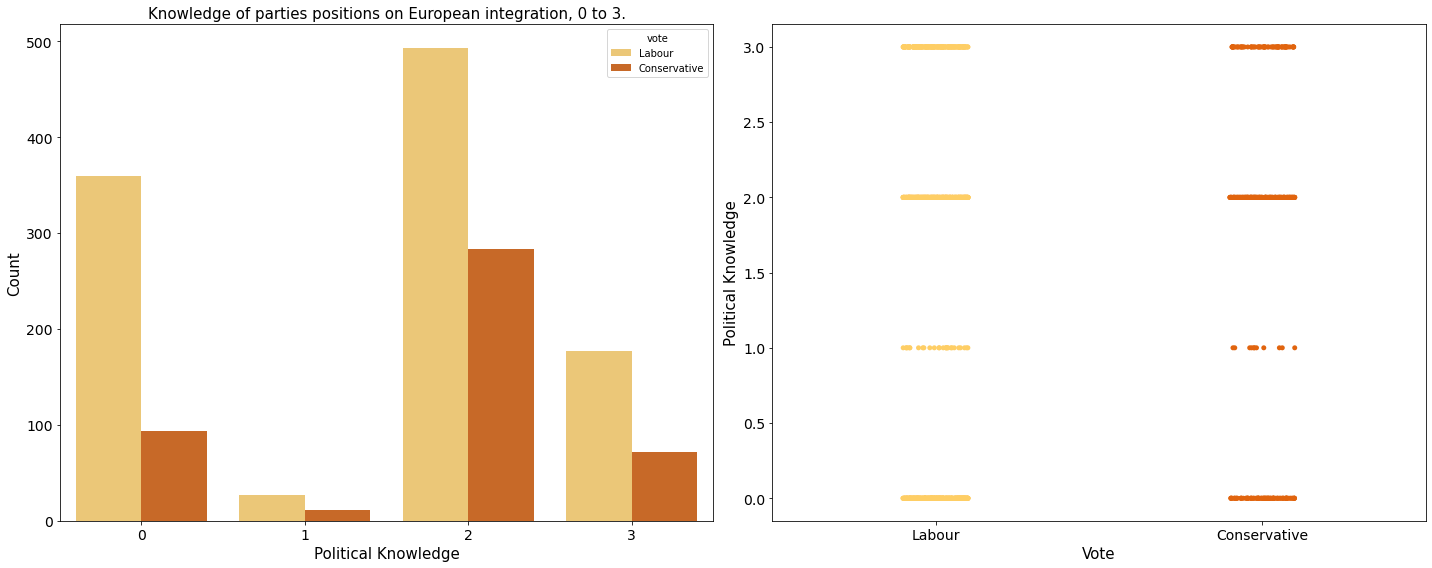

In [38]:
plt.figure(figsize = (20,8))
plt.subplot(1,2,1)
plt.title('Knowledge of parties positions on European integration, 0 to 3.', fontsize = 15)
sns.countplot(x="political.knowledge", data=data_df, hue='vote',palette='YlOrBr')
plt.xlabel('Political Knowledge', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.subplot(1,2,2)
sns.stripplot(data_df['vote'], data_df['political.knowledge'],palette='YlOrBr', jitter=True) 
plt.ylabel('Political Knowledge', fontsize = 15);
plt.xlabel('Vote', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.tight_layout();

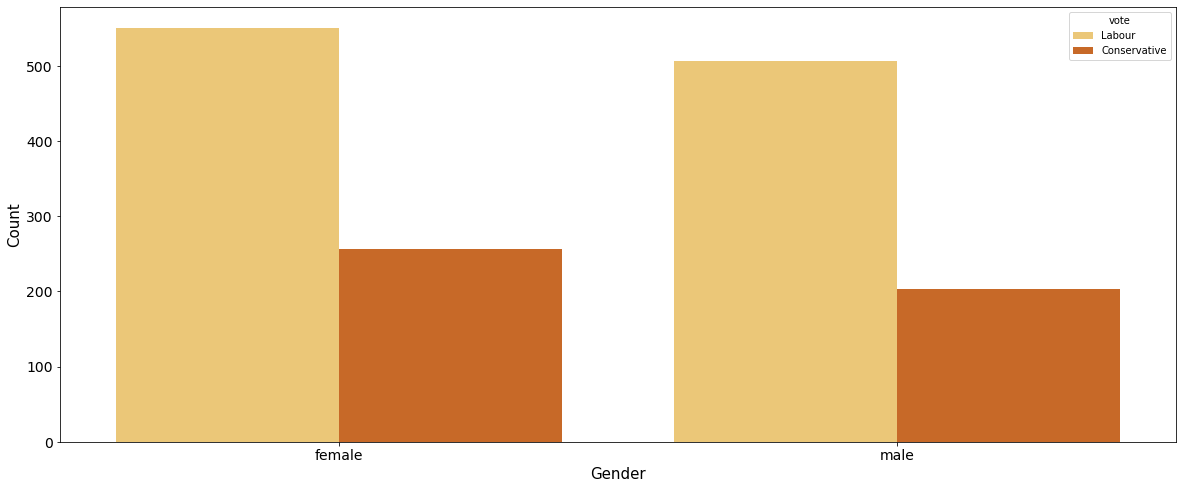

In [39]:
plt.figure(figsize = (20,8))
sns.countplot(x="gender", data=data_df, hue='vote',palette='YlOrBr')
plt.xlabel('Gender', fontsize = 15);
plt.ylabel('Count', fontsize = 15);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


**Checking Correlation**

In [40]:
data_df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018687,-0.038868,0.032084,0.031144,0.064562,-0.046598
economic.cond.national,0.018687,1.000000,0.347687,0.326141,-0.200790,-0.209150,-0.023510
economic.cond.household,-0.038868,0.347687,1.000000,0.215822,-0.100392,-0.112897,-0.038528
Blair,0.032084,0.326141,0.215822,1.000000,-0.243508,-0.295944,-0.021299
Hague,0.031144,-0.200790,-0.100392,-0.243508,1.000000,0.285738,-0.029906
Europe,0.064562,-0.209150,-0.112897,-0.295944,0.285738,1.000000,-0.151197
political.knowledge,-0.046598,-0.023510,-0.038528,-0.021299,-0.029906,-0.151197,1.000000


**Correlation Plot**

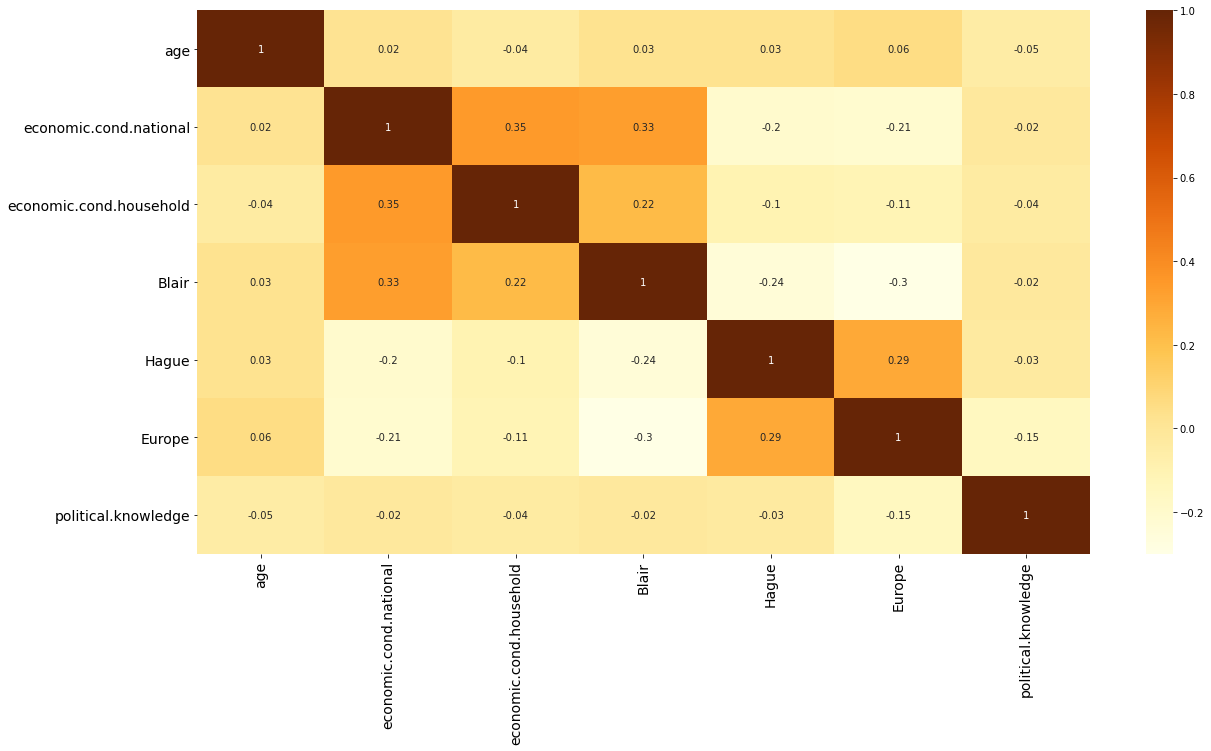

In [41]:
plt.figure(figsize=(20,10))
sns.heatmap(data_df.corr().round(2),annot=True, cmap = 'YlOrBr');
plt.xticks(fontsize=14, rotation = 90);
plt.yticks(fontsize=14);


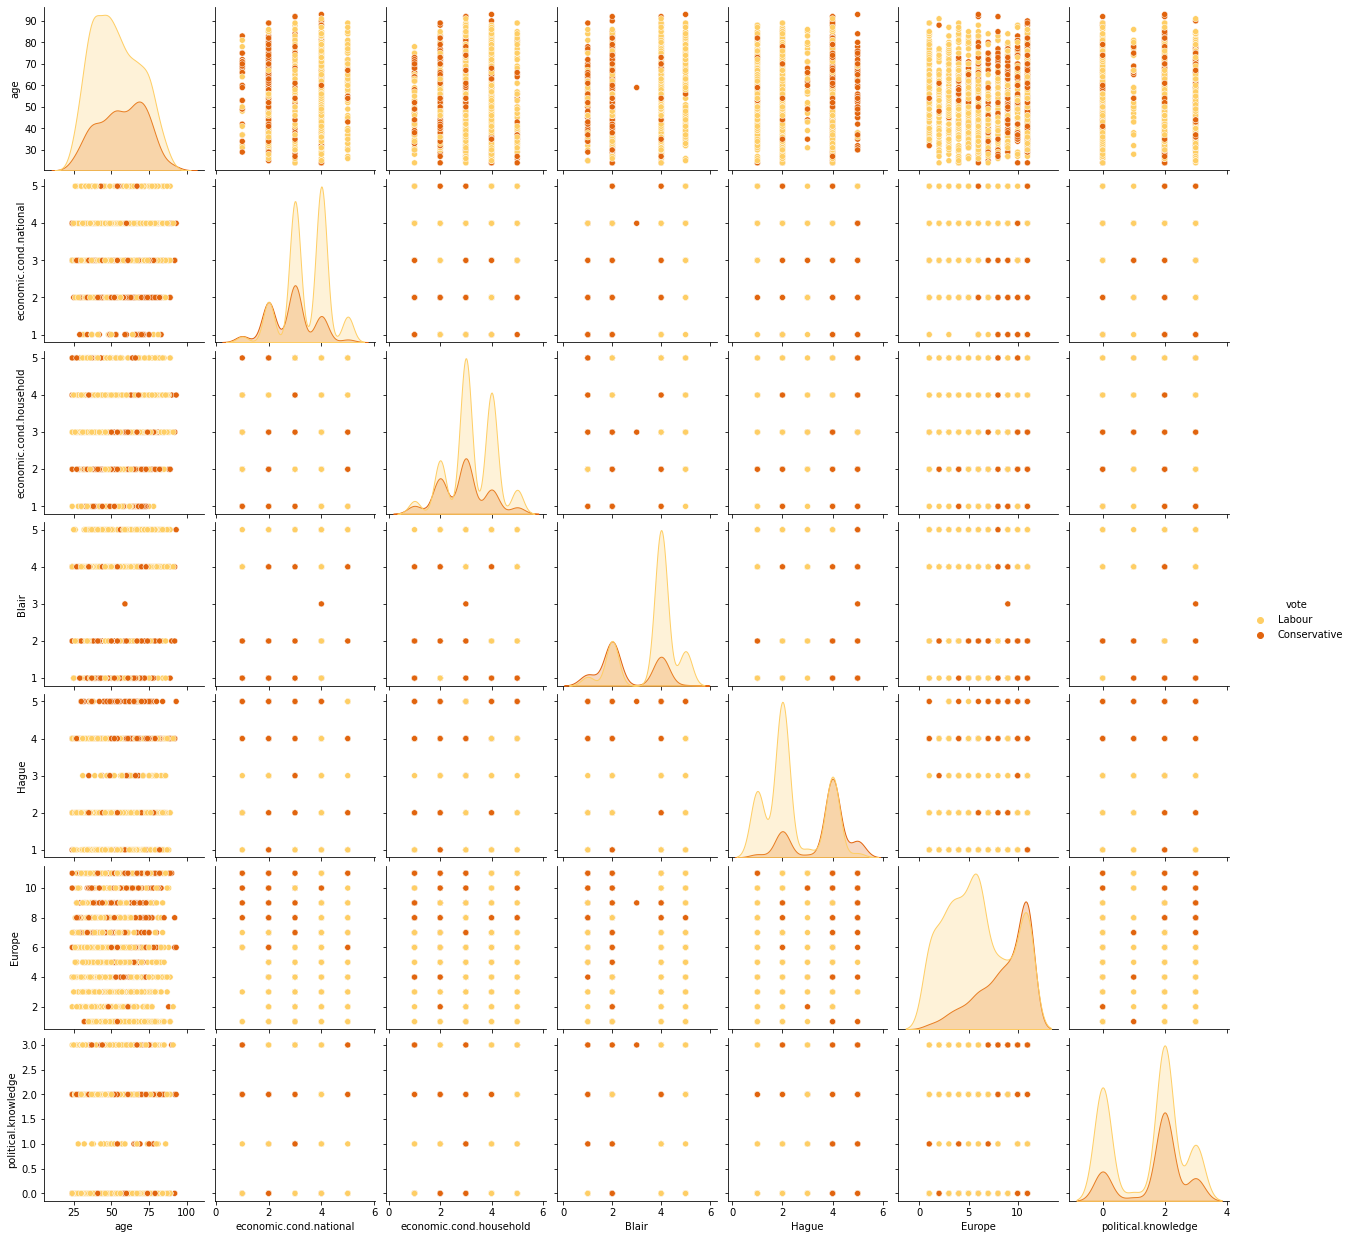

In [42]:
sns.pairplot(data_df,hue ='vote',palette='YlOrBr');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


**Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30)**

**Dummy Variable one hot Encoding for Gender**

In [43]:
data_df =pd.get_dummies(data_df, columns=['gender'],drop_first=True)

In [44]:
data_df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_bins,gender_male
0,Labour,43,3,3,4,1,2,2,40s,0
1,Labour,36,4,4,4,4,5,2,30s,1
2,Labour,35,4,4,5,2,3,2,30s,1
3,Labour,24,4,2,2,1,4,0,20s,0
4,Labour,41,2,2,1,1,6,2,40s,1


In [45]:
data_df.drop("age",axis=1,inplace=True)

In [46]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1517 non-null   object  
 1   economic.cond.national   1517 non-null   int64   
 2   economic.cond.household  1517 non-null   int64   
 3   Blair                    1517 non-null   int64   
 4   Hague                    1517 non-null   int64   
 5   Europe                   1517 non-null   int64   
 6   political.knowledge      1517 non-null   int64   
 7   age_bins                 1517 non-null   category
 8   gender_male              1517 non-null   uint8   
dtypes: category(1), int64(6), object(1), uint8(1)
memory usage: 130.4+ KB


**Ordinal Encoding of Age bins**

In [47]:
feature = "age_bins"
data_df["age_bins"] = pd.Categorical(data_df["age_bins"]).codes

In [48]:
data_df.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_bins,gender_male
0,Labour,3,3,4,1,2,2,2,0
1,Labour,4,4,4,4,5,2,1,1
2,Labour,4,4,5,2,3,2,1,1
3,Labour,4,2,2,1,4,0,0,0
4,Labour,2,2,1,1,6,2,2,1


**Scaling**

In [49]:
con

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

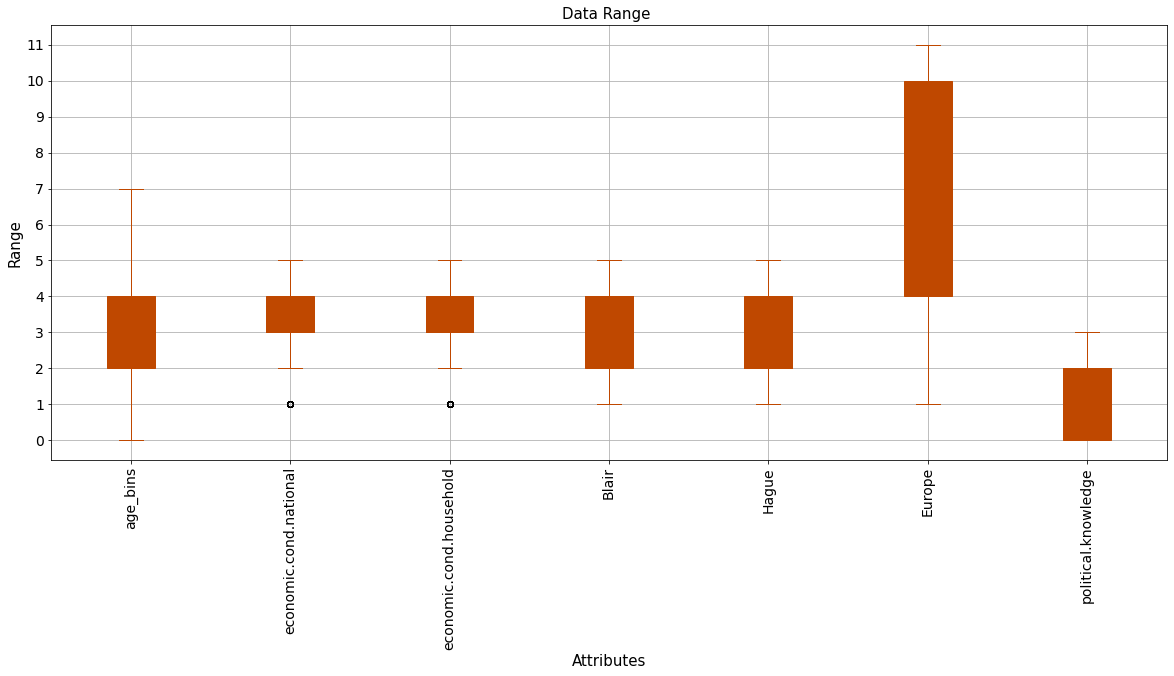

In [50]:
vari = ['age_bins',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']
plt.figure(figsize = (20,8))
data_df.boxplot(vari, notch=False, widths=0.3, patch_artist=True, color = '#bf4800')


plt. yticks(np.arange(0,11.1, step=1))
plt.ylabel('Range', fontsize = 15);
plt.xlabel('Attributes', fontsize = 15);
plt.title("Data Range ", fontsize = 15);
plt.xticks(rotation = 90, fontsize=14);
plt.yticks(fontsize=14);

Since Above figure shows that points rangess are 0 -11 and most of the variables are ordinal variables so there is no need of scaling

In [51]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   economic.cond.national   1517 non-null   int64 
 2   economic.cond.household  1517 non-null   int64 
 3   Blair                    1517 non-null   int64 
 4   Hague                    1517 non-null   int64 
 5   Europe                   1517 non-null   int64 
 6   political.knowledge      1517 non-null   int64 
 7   age_bins                 1517 non-null   int8  
 8   gender_male              1517 non-null   uint8 
dtypes: int64(6), int8(1), object(1), uint8(1)
memory usage: 130.1+ KB


**Checking the Distributions of class (Vote)**

In [52]:
data_df.groupby(["vote"]).count()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_bins,gender_male
vote,,,,,,,,
Conservative,460,460,460,460,460,460,460,460
Labour,1057,1057,1057,1057,1057,1057,1057,1057


**Data Split: Split the data into train and test (70:30)**

**Train-Test Split**

In [53]:
X = data_df.drop('vote', axis=1)  
y = data_df['vote']

In [54]:
X.head()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,age_bins,gender_male
0,3,3,4,1,2,2,2,0
1,4,4,4,4,5,2,1,1
2,4,4,5,2,3,2,1,1
3,4,2,2,1,4,0,0,0
4,2,2,1,1,6,2,2,1


In [55]:
y.head()

0    Labour
1    Labour
2    Labour
3    Labour
4    Labour
Name: vote, dtype: object

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [57]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

X_train:  (1061, 8)
X_test:  (456, 8)
y_train:  (1061,)
y_test:  (456,)


**Apply Logistic Regression and LDA (Linear Discriminant Analysis). Interpret the inferences of both models.**


**LOGISTIC REGRESSION**

In [58]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix,recall_score
import warnings
warnings.filterwarnings('ignore')

In [59]:
model = LogisticRegression(solver='newton-cg', max_iter=10000,penalty='none',verbose=True, n_jobs=2)
model.fit(X_train, y_train);

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.9s finished


**Predicting on Training and Test dataset Logistic Regression**

In [60]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

**Getting the Predicted Classes and Probs**

In [61]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.430059,0.569941
1,0.153130,0.846870
2,0.006441,0.993559
3,0.832957,0.167043
4,0.072029,0.927971


**Model Evaluation**

**Accuracy - Train Data**

In [62]:
LR_train_score= model.score(X_train, y_train)
LR_train_score
LR_train_recall_score_Labour = recall_score(y_train,ytrain_predict,labels=None,pos_label='Labour')
LR_train_recall_score_Conservative = recall_score(y_train,ytrain_predict,labels=None,pos_label='Conservative')
print(LR_train_score,LR_train_recall_score_Conservative,LR_train_recall_score_Labour)

0.8303487276154571 0.6351791530944625 0.9098143236074271


AUC: 0.88993


Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

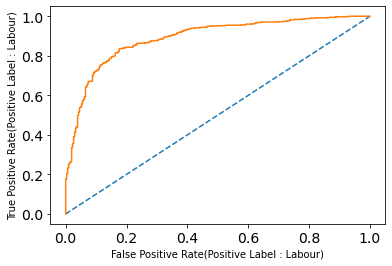

In [63]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.5f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs,pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**Accuracy - Test Data**

In [64]:
LR_test_score =model.score(X_test, y_test)
LR_test_score
LR_test_recall_score_Labour = recall_score(y_test,ytest_predict,labels=None,pos_label='Labour')
LR_test_recall_score_Conservative = recall_score(y_test,ytest_predict,labels=None,pos_label='Conservative')
print(LR_test_score,LR_test_recall_score_Conservative,LR_test_recall_score_Labour)

0.831140350877193 0.7254901960784313 0.8844884488448845


AUC: 0.88332


Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

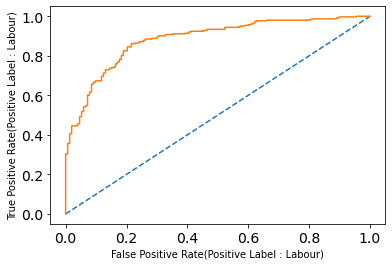

In [65]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.5f' % test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs,pos_label='Labour') 
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**Confusion Matrix for the training data**

              precision    recall  f1-score   support

Conservative       0.74      0.64      0.68       307
      Labour       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061



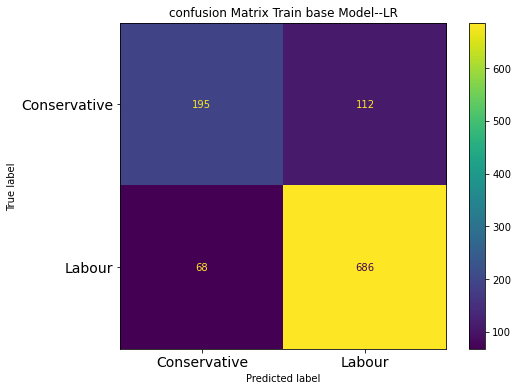

In [66]:
print(classification_report(y_train, ytrain_predict))
fig,ax = plt.subplots(figsize = (8,6))
plt.title("confusion Matrix Train base Model--LR")
plot_confusion_matrix(model,X_train,y_train, ax=ax, );
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);


**Confusion Matrix for test data**

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456



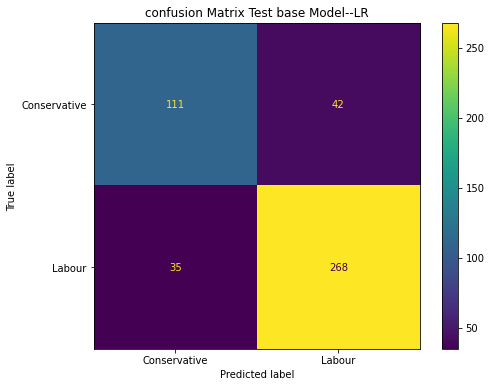

In [67]:
print(classification_report(y_test, ytest_predict))
fig,ax = plt.subplots(figsize = (8,6))
plt.title("confusion Matrix Test base Model--LR")
plot_confusion_matrix(model,X_test,y_test,ax=ax);

0.8899333845981043 0.8833236264802949


Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

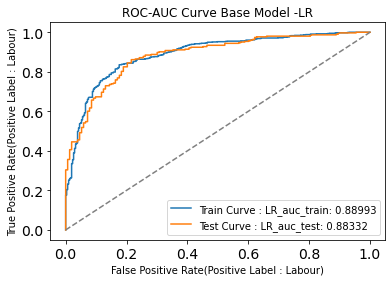

In [68]:
LR_train_predict_prob = model.predict_proba(X_train)
LR_test_predict_prob = model.predict_proba(X_test)
LR_pred_train_prob = model.predict_proba(X_train)
LR_pred_test_prob = model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print(LR_auc_train,LR_auc_test);


fig,ax = plt.subplots()
plot_roc_curve(model, X_train,y_train,ax=ax, 
               label = 'Train Curve : LR_auc_train: '+str(round(LR_auc_train,5)));
plot_roc_curve(model, X_test, y_test, ax=ax,
              label = 'Test Curve : LR_auc_test: '+ str(round(LR_auc_test,5)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve Base Model -LR');
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**Tuning of Logistic Regression Model**

**Applying GridSearchCV**

In [69]:
grid={'penalty':['l2','l1'],
      'solver':['sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [70]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [71]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           cv = 3,n_jobs=-1,scoring='accuracy')

In [72]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'l1'], 'solver': ['sag', 'lbfgs'],
                         'tol': [0.0001, 1e-05]},
             scoring='accuracy')

In [73]:
grid_search.best_params_

{'penalty': 'l2', 'solver': 'sag', 'tol': 0.0001}

In [74]:
grid_search.best_estimator_

LogisticRegression(max_iter=10000, n_jobs=2, solver='sag')

In [75]:
best_model = grid_search.best_estimator_

In [76]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [77]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.429539,0.570461
1,0.154899,0.845101
2,0.006597,0.993403
3,0.830193,0.169807
4,0.073432,0.926568


**Confusion Matrix Train Data of Tuned Model- LR**

              precision    recall  f1-score   support

Conservative       0.74      0.64      0.68       307
      Labour       0.86      0.91      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.77      0.78      1061
weighted avg       0.83      0.83      0.83      1061
 



Text(0.5, 1.0, 'Confusion Matrix Train Data of Tuned Model- LR')

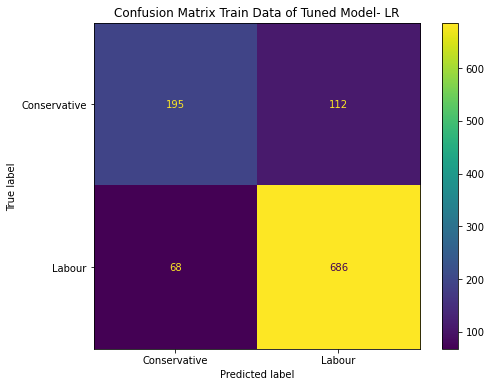

In [78]:
## Confusion matrix on the training data
print(classification_report(y_train, ytrain_predict),'\n');
fig,ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(best_model,X_train,y_train,ax=ax);
plt.title('Confusion Matrix Train Data of Tuned Model- LR')

              precision    recall  f1-score   support

Conservative       0.76      0.73      0.74       153
      Labour       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456
 



Text(0.5, 1.0, 'Confusion Matrix Test Data of Tuned Model- LR')

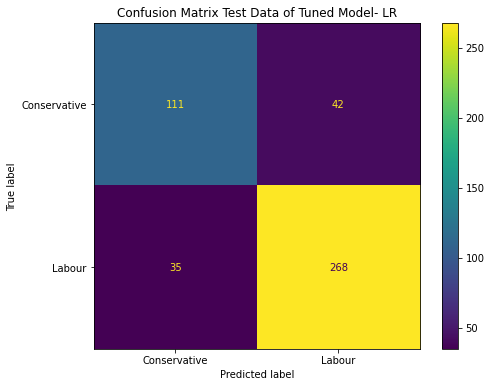

In [79]:
## Confusion matrix & Classification Report on the test data
print(classification_report(y_test, ytest_predict),'\n');
fig,ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(best_model,X_test,y_test,ax = ax);
plt.title('Confusion Matrix Test Data of Tuned Model- LR')

0.8900025056376848 0.883366768049354


Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

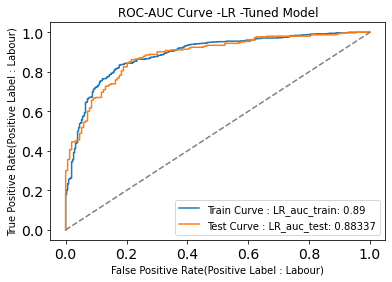

In [80]:
LR_train_predict_prob = best_model.predict_proba(X_train)
LR_test_predict_prob = best_model.predict_proba(X_test)
LR_pred_train_prob = best_model.predict_proba(X_train)
LR_pred_test_prob = best_model.predict_proba(X_test)

LR_auc_train = roc_auc_score(y_train,LR_train_predict_prob[:,1])
LR_auc_test = roc_auc_score(y_test,LR_test_predict_prob[:,1])
print(LR_auc_train,LR_auc_test)


fig,ax = plt.subplots()
plot_roc_curve(best_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : LR_auc_train: '+str(round(LR_auc_train,5)));
plot_roc_curve(best_model, X_test, y_test, ax=ax,
              label = 'Test Curve : LR_auc_test: '+ str(round(LR_auc_test,5)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve -LR -Tuned Model')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**Linear Discriminant Analysis**

In [81]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

**Training Performance LDA**

In [82]:
LDA_train_predict = LDA_model.predict(X_train)
LDA_train_score = LDA_model.score(X_train, y_train)
LDA_train_recall_score_Labour = recall_score(y_train,LDA_train_predict,labels=None,pos_label='Labour')
LDA_train_recall_score_Conservative = recall_score(y_train,LDA_train_predict,labels=None,pos_label='Conservative')
print(LDA_train_score,LDA_train_recall_score_Conservative,LDA_train_recall_score_Labour)

0.8331762488218661 0.6514657980456026 0.9071618037135278


In [83]:
LDA_train_predict

array(['Conservative', 'Labour', 'Labour', ..., 'Labour', 'Labour',
       'Labour'], dtype='<U12')

**Confusion Matrix on Train Data -LDA & classification Report**

              precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



Text(0.5, 1.0, 'Confusion Matrix on Train Data Base Model -LDA')

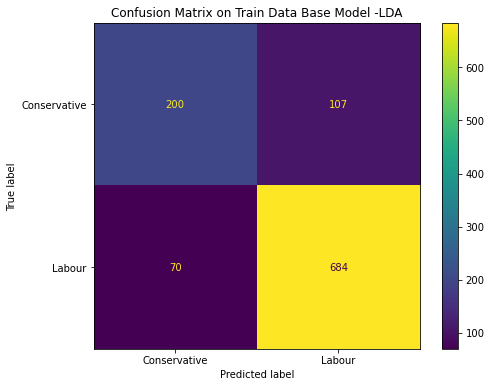

In [84]:
print(classification_report(y_train, LDA_train_predict))
fig,ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(LDA_model,X_train,y_train, ax = ax);
plt.title('Confusion Matrix on Train Data Base Model -LDA')

**Test Performance LDA**

In [85]:
LDA_test_predict = LDA_model.predict(X_test)
LDA_test_score = LDA_model.score(X_test, y_test)
LDA_test_recall_score_Labour = recall_score(y_test,LDA_test_predict,labels=None,pos_label='Labour')
LDA_test_recall_score_Conservative = recall_score(y_test,LDA_test_predict,labels=None,pos_label='Conservative')
print(LDA_test_score,LDA_test_recall_score_Conservative,LDA_test_recall_score_Labour)

0.8377192982456141 0.7254901960784313 0.8943894389438944


**Confusion Matrix on Test Data -LDA & classification Report**

              precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456



Text(0.5, 1.0, 'Confusion Matrix on Test Data Base Model -LDA')

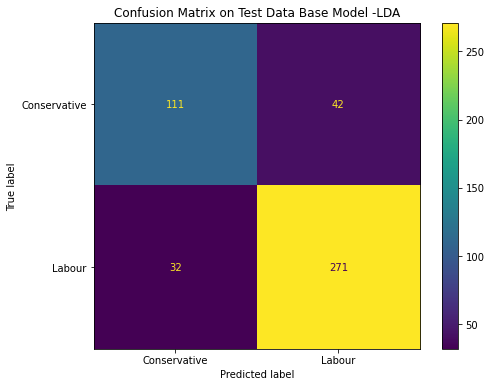

In [86]:
print(classification_report(y_test, LDA_test_predict))
fig,ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(LDA_model,X_test,y_test, ax = ax);
plt.title('Confusion Matrix on Test Data Base Model -LDA')

**Probability prediction for the training and test data -LDA**

In [87]:
from sklearn.metrics import roc_auc_score,plot_roc_curve

In [88]:
pred_train_prob = LDA_model.predict_proba(X_train)
pred_test_prob = LDA_model.predict_proba(X_test)

auc_train = roc_auc_score(y_train,pred_train_prob[:,1])
auc_test = roc_auc_score(y_test,pred_test_prob[:,1])

Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

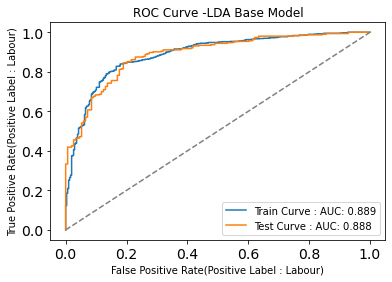

In [89]:
fig,ax = plt.subplots()
plot_roc_curve(LDA_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : AUC: '+str(round(auc_train,3)));
plot_roc_curve(LDA_model, X_test, y_test, ax=ax,
              label = 'Test Curve : AUC: '+ str(round(auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -LDA Base Model')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

AUC for the Training Data: 0.889
AUC for the Test Data: 0.888


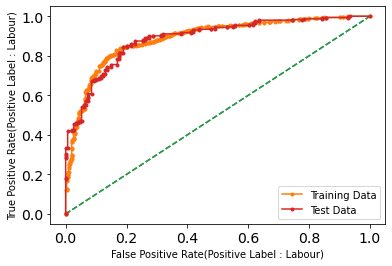

In [90]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_train_prob[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_train_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_test_prob[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_test_prob[:,1],pos_label='Labour')
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)
# show the plot
plt.legend(loc='best')
plt.show()


**Changing Default Threshold Probability**

In [91]:
from sklearn.metrics import accuracy_score,f1_score, recall_score

In [92]:
thresh = [] # empty list to store threshold values
acc = [] # empty list to store accuracy for various threshold values
f1_scr = [] # empty list to store F1 score for various...
rec = [] # empty list to store recall score for various...

for j in np.arange(0.1,1,0.1):
    thresh.append(j)
    custom_prob = j #defining the custom cut-off/threshold probability value of our choice
    custom_cutoff_data=[]#defining an empty list to store category pred
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if pred_train_prob[:,1][i] > custom_prob:#checking the condition for our probability values to be 
            #greater than the custom cutoff/threshold probability value
            a='Labour' #if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a='Conservative' #if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding category predictions for the given j(cut off) to the list
    acc.append(np.round(accuracy_score(y_train,custom_cutoff_data),3))
    f1_scr.append(np.round(f1_score(y_train,custom_cutoff_data ,labels=None,pos_label= 'Labour'),3))
    rec.append(np.round(recall_score(y_train,custom_cutoff_data,labels=None,pos_label= 'Labour'),3))

In [93]:
pd.DataFrame({'Threshold': thresh,
             'Accuracy':acc,
             'F-1 Score': f1_scr,
             'Recall':rec})

,Threshold,Accuracy,F-1 Score,Recall
0,0.1,0.761,0.854,0.987
1,0.2,0.791,0.868,0.968
2,0.3,0.812,0.878,0.952
3,0.4,0.832,0.888,0.939
4,0.5,0.833,0.885,0.907
5,0.6,0.826,0.876,0.870
6,0.7,0.833,0.877,0.838
7,0.8,0.790,0.835,0.751
8,0.9,0.697,0.737,0.599


In [94]:
data_pred_custom_cutoff=[]
for i in range(len(pred_test_prob)):
    if pred_test_prob[:,1][i] > 0.4: # for best recall performace
        a = 'Labour'
    else:
        a = 'Conservative'
    data_pred_custom_cutoff.append(a)

In [95]:
print('Classification Report of the default cut-off test data:\n\n',
      classification_report(y_test,LDA_test_predict),'\n\n\n')

print('Classification Report of the custom cut-off test data:\n\n',
      classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

Conservative       0.79      0.66      0.72       153
      Labour       0.84      0.91      0.87       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456
 



**Applying GridsearchCV IN LDA**

In [96]:
grid={'solver':['lsqr','eigen'],
      'n_components':[1,7,2]}

In [97]:
model = LinearDiscriminantAnalysis()

In [98]:
grid_search = GridSearchCV(estimator = model, 
                           param_grid = grid, 
                           cv = 5,n_jobs=-1)

In [99]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'n_components': [1, 7, 2],
                         'solver': ['lsqr', 'eigen']})

In [100]:
grid_search.best_params_

{'n_components': 1, 'solver': 'lsqr'}

In [101]:
grid_search.best_estimator_

LinearDiscriminantAnalysis(n_components=1, solver='lsqr')

In [102]:
best_model = grid_search.best_estimator_

In [103]:
ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [104]:
ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.472249,0.527751
1,0.138578,0.861422
2,0.005601,0.994399
3,0.857034,0.142966
4,0.060017,0.939983


**Confusion Matrx of Train data Tuned LDA Model**

              precision    recall  f1-score   support

Conservative       0.74      0.65      0.69       307
      Labour       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061
 



Text(0.5, 1.0, 'Confusion Matrx of Train data Tuned LDA Model')

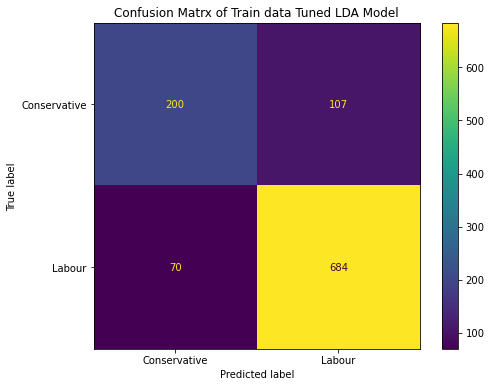

In [105]:
print(classification_report(y_train, ytrain_predict),'\n');
fig,ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(best_model,X_train,y_train,cmap='viridis', ax = ax);
plt.title('Confusion Matrx of Train data Tuned LDA Model')

**Confusion Matrx of Test data Tuned LDA Model**

              precision    recall  f1-score   support

Conservative       0.78      0.73      0.75       153
      Labour       0.87      0.89      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.84      0.84      0.84       456
 



Text(0.5, 1.0, 'Confusion Matrx of Test data Tuned LDA Model')

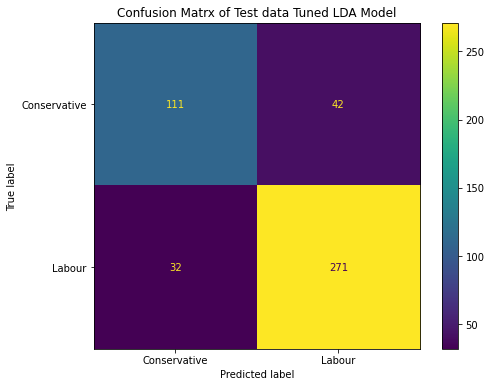

In [106]:
print(classification_report(y_test, ytest_predict),'\n');
fig,ax = plt.subplots(figsize =(8,6))
plot_confusion_matrix(best_model,X_test,y_test, ax = ax);
plt.title('Confusion Matrx of Test data Tuned LDA Model')

Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

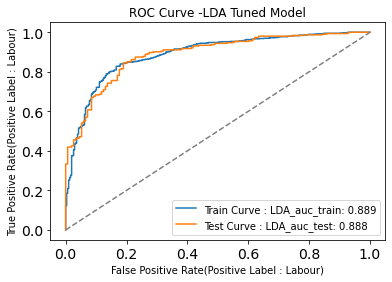

In [107]:
LDA_pred_train_prob = best_model.predict_proba(X_train)
LDA_pred_test_prob = best_model.predict_proba(X_test)

LDA_auc_train = roc_auc_score(y_train,pred_train_prob[:,1])
LDA_auc_test = roc_auc_score(y_test,pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(best_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : LDA_auc_train: '+str(round(LDA_auc_train,3)));
plot_roc_curve(best_model, X_test, y_test, ax=ax,
              label = 'Test Curve : LDA_auc_test: '+ str(round(LDA_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -LDA Tuned Model')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**KNN Model and Naïve Bayes Model. Interpret the inferences of each model**

**Naive Bayes**

In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix, classification_report, recall_score

In [109]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

**Training Performance of Naive Bayes**

In [110]:
NB_train_predict = NB_model.predict(X_train)
NB_train_score = NB_model.score(X_train, y_train)
NB_train_recall_score_Labour = recall_score(y_train,NB_train_predict,labels=None,pos_label='Labour')
NB_train_recall_score_Conservative = recall_score(y_train,NB_train_predict,labels=None,pos_label='Conservative')
print(NB_train_score,NB_train_recall_score_Conservative,NB_train_recall_score_Labour)

0.8360037700282752 0.6938110749185668 0.8938992042440318


**Confusion Matrix of Train- Base Model NB**

              precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.89      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



Text(0.5, 1.0, 'Confusion Matrix of Train- Base Model NB')

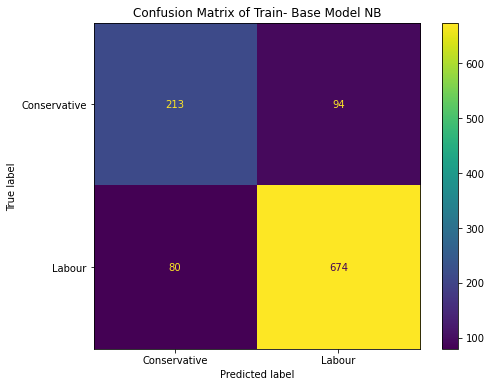

In [111]:
print(classification_report(y_train, NB_train_predict))
fig,ax = plt.subplots(figsize =(8,6))
plot_confusion_matrix(NB_model,X_train,y_train, ax = ax);
plt.title('Confusion Matrix of Train- Base Model NB')

**Test Performance of Naive Bayes**

In [112]:
NB_test_predict = NB_model.predict(X_test)
NB_test_score = NB_model.score(X_test, y_test)
NB_test_recall_score_Labour = recall_score(y_test,NB_test_predict,labels=None,pos_label='Labour')
NB_test_recall_score_Conservative = recall_score(y_test,NB_test_predict,labels=None,pos_label='Conservative')
print(NB_test_score,NB_test_recall_score_Conservative,NB_test_recall_score_Labour)

0.8201754385964912 0.7254901960784313 0.8679867986798679


**Confusion Matrix of Test- Base Model NB**

              precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 1.0, 'Confusion Matrix of Test- Base Model NB')

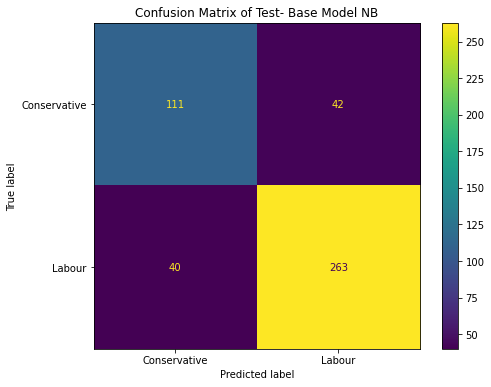

In [113]:
print(classification_report(y_test, NB_test_predict))
fig,ax = plt.subplots(figsize =(8,6))
plot_confusion_matrix(NB_model, X_test, y_test, ax = ax);
plt.title('Confusion Matrix of Test- Base Model NB')

Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

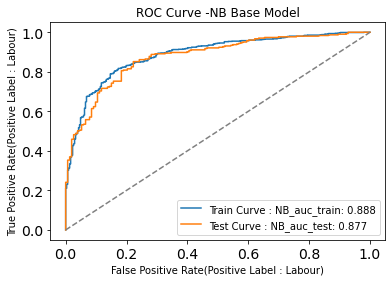

In [114]:
NB_pred_train_prob = NB_model.predict_proba(X_train)
NB_pred_test_prob = NB_model.predict_proba(X_test)

NB_auc_train = roc_auc_score(y_train,NB_pred_train_prob[:,1])
NB_auc_test = roc_auc_score(y_test,NB_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(NB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : NB_auc_train: '+str(round(NB_auc_train,3)));
plot_roc_curve(NB_model, X_test, y_test, ax=ax,
              label = 'Test Curve : NB_auc_test: '+ str(round(NB_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -NB Base Model')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**KNN**

In [115]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

**Training Performance of KNN**

In [116]:
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score_Labour = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Labour')
KNN_train_recall_score_Conservative = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Conservative')
print(KNN_train_score,KNN_train_recall_score_Conservative,KNN_train_recall_score_Labour)

0.8567389255419415 0.7035830618892508 0.9190981432360743


**Confusion Matrix - Train KNN-Base Model**

              precision    recall  f1-score   support

Conservative       0.78      0.70      0.74       307
      Labour       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061



Text(0.5, 1.0, 'Confusion Matrix - Train KNN-Base Model')

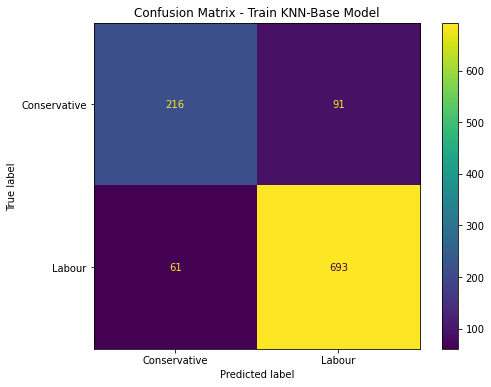

In [117]:
print(classification_report(y_train, KNN_train_predict))
fig,ax = plt.subplots(figsize =(8,6))
plot_confusion_matrix(KNN_model,X_train,y_train, ax = ax);
plt.title('Confusion Matrix - Train KNN-Base Model')

**Test Performance of KNN**

In [118]:
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score_Labour = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Labour')
KNN_test_recall_score_Conservative  = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Conservative')
print(KNN_test_score,KNN_test_recall_score_Conservative,KNN_test_recall_score_Labour)

0.8048245614035088 0.6405228758169934 0.8877887788778878


**Confusion Matrix - Test KNN-Base Model**

              precision    recall  f1-score   support

Conservative       0.74      0.64      0.69       153
      Labour       0.83      0.89      0.86       303

    accuracy                           0.80       456
   macro avg       0.79      0.76      0.77       456
weighted avg       0.80      0.80      0.80       456



Text(0.5, 1.0, 'Confusion Matrix - Test KNN-Base Model')

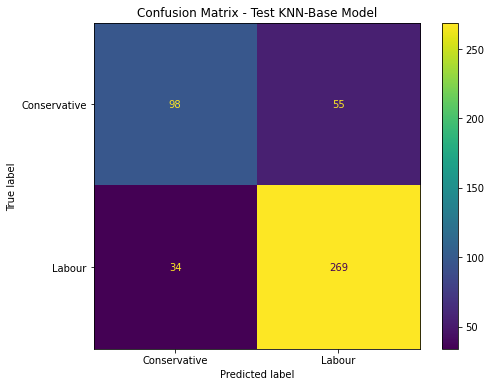

In [119]:
print(classification_report(y_test, KNN_test_predict))
fig,ax = plt.subplots(figsize =(8,6))
plot_confusion_matrix(KNN_model,X_test, y_test, ax = ax);
plt.title('Confusion Matrix - Test KNN-Base Model')

Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

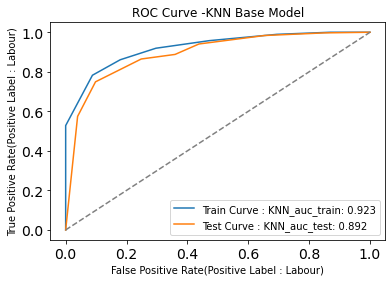

In [120]:
KNN_pred_train_prob = KNN_model.predict_proba(X_train)
KNN_pred_test_prob = KNN_model.predict_proba(X_test)

KNN_auc_train = roc_auc_score(y_train,KNN_pred_train_prob[:,1])
KNN_auc_test = roc_auc_score(y_test,KNN_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(KNN_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : KNN_auc_train: '+str(round(KNN_auc_train,3)));
plot_roc_curve(KNN_model, X_test, y_test, ax=ax,
              label = 'Test Curve : KNN_auc_test: '+ str(round(KNN_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -KNN Base Model')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**TUNING OF KNN MODEL WITH LESS MISCLASSIFICATION ERROR**

**Misclassification error (MCE) = 1 - Test accuracy score. Calculated MCE for each model with neighbours = 1,3,5...19 and find the model with lowest MCE**

In [121]:
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores] # this technique is called list comprehension
MCE

[0.21052631578947367,
 0.1907894736842105,
 0.17982456140350878,
 0.19517543859649122,
 0.18201754385964908,
 0.1885964912280702,
 0.1864035087719298,
 0.17105263157894735,
 0.16885964912280704,
 0.17105263157894735]

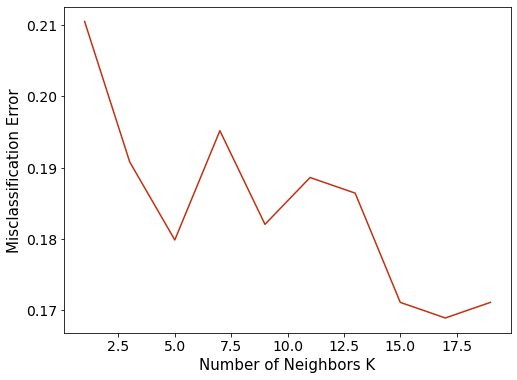

In [216]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.figure(figsize = (8,6))
plt.plot(range(1,20,2), MCE, color='#C32F0F')
plt.xlabel('Number of Neighbors K', fontsize = 15)
plt.ylabel('Misclassification Error', fontsize = 15)
#plt.grid()
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.show()


Misclassification Error is low at K =17 so we will take 17 Neighbors

In [123]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=17)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

**Training Performance of KNN Tuned Model**

In [124]:
KNN_train_predict = KNN_model.predict(X_train)
KNN_train_score = KNN_model.score(X_train, y_train)
KNN_train_recall_score_Labour = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Labour')
KNN_train_recall_score_Conservative = recall_score(y_train,KNN_train_predict,labels=None,pos_label = 'Conservative')
print(KNN_train_score,KNN_train_recall_score_Conservative,KNN_train_recall_score_Labour)

0.8388312912346843 0.6840390879478827 0.9018567639257294


**Confusion Matrix Train KNN Tuned Model**

              precision    recall  f1-score   support

Conservative       0.74      0.68      0.71       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



Text(0.5, 1.0, 'Confusion Matrix Train KNN Tuned Model')

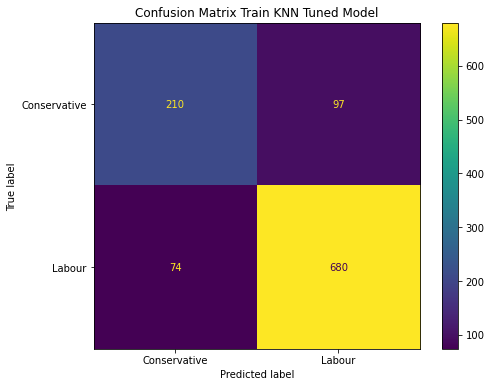

In [125]:
print(classification_report(y_train, KNN_train_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(KNN_model,X_train,y_train, ax= ax);
plt.title('Confusion Matrix Train KNN Tuned Model')

**Test Performance of KNN Tuned Model**

In [126]:
KNN_test_predict = KNN_model.predict(X_test)
KNN_test_score = KNN_model.score(X_test, y_test)
KNN_test_recall_score_Labour = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Labour')
KNN_test_recall_score_Conservative  = recall_score(y_test,KNN_test_predict,labels=None,pos_label = 'Conservative')
print(KNN_test_score,KNN_test_recall_score_Conservative,KNN_test_recall_score_Labour)

0.831140350877193 0.6797385620915033 0.9075907590759076


**Confusion Matrix Train KNN Tuned Model**

              precision    recall  f1-score   support

Conservative       0.79      0.68      0.73       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 1.0, 'Confusion Matrix Train KNN Tuned Model')

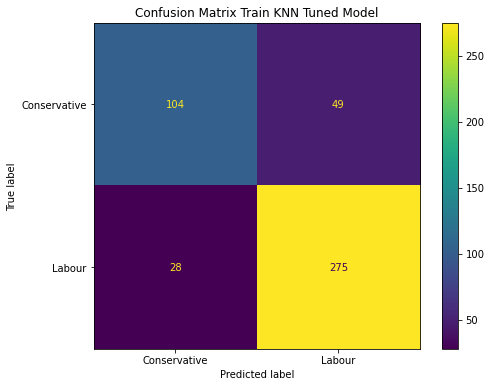

In [127]:
print(classification_report(y_test, KNN_test_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(KNN_model,X_test, y_test, ax = ax);
plt.title('Confusion Matrix Train KNN Tuned Model')

Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

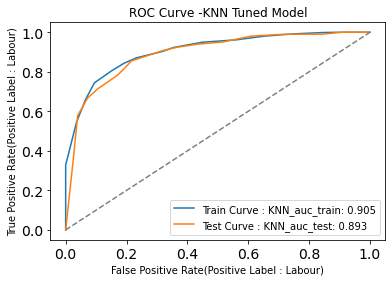

In [128]:
KNN_pred_train_prob = KNN_model.predict_proba(X_train)
KNN_pred_test_prob = KNN_model.predict_proba(X_test)

KNN_auc_train = roc_auc_score(y_train,KNN_pred_train_prob[:,1])
KNN_auc_test = roc_auc_score(y_test,KNN_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(KNN_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : KNN_auc_train: '+str(round(KNN_auc_train,3)));
plot_roc_curve(KNN_model, X_test, y_test, ax=ax,
              label = 'Test Curve : KNN_auc_test: '+ str(round(KNN_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -KNN Tuned Model')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**Model Tuning, Bagging and Boosting**

**Decision Tree**

In [129]:
from sklearn import tree

DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

**Training Data of Decision Tree**

In [130]:
DT_train_predict = DT_model.predict(X_train)
DT_train_score = DT_model.score(X_train, y_train)
DT_train_recall_score_Labour = recall_score(y_train,DT_train_predict,labels=None,pos_label = 'Labour')
DT_train_recall_score_Conservative = recall_score(y_train,DT_train_predict,labels=None,pos_label = 'Conservative')
print(DT_train_score,DT_train_recall_score_Conservative,DT_train_recall_score_Labour)

0.9924599434495759 1.0 0.9893899204244032


**Decision Tree -Train Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.97      1.00      0.99       307
      Labour       1.00      0.99      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



Text(0.5, 1.0, 'Decision Tree -Train Confusion Matrix')

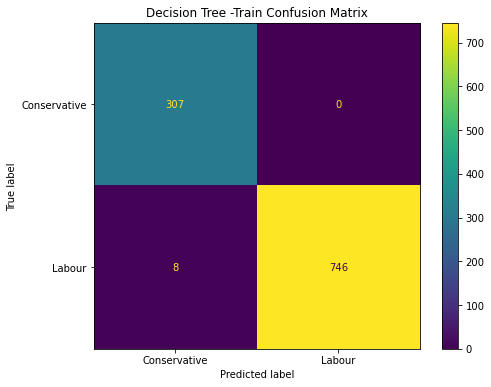

In [131]:
print(classification_report(y_train, DT_train_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(DT_model,X_train,y_train, ax = ax);
plt.title('Decision Tree -Train Confusion Matrix')

**Test Performance of Decision Tree**

In [132]:
DT_test_predict = DT_model.predict(X_test)
DT_test_score = DT_model.score(X_test, y_test)
DT_test_recall_score_Labour = recall_score(y_test, DT_test_predict,labels=None,pos_label = 'Labour')
DT_test_recall_score_Conservative = recall_score(y_test, DT_test_predict,labels=None,pos_label = 'Conservative')
print(DT_test_score,DT_test_recall_score_Conservative,DT_test_recall_score_Labour)

0.7609649122807017 0.6666666666666666 0.8085808580858086


**Decision Tree -Test Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.64      0.67      0.65       153
      Labour       0.83      0.81      0.82       303

    accuracy                           0.76       456
   macro avg       0.73      0.74      0.73       456
weighted avg       0.76      0.76      0.76       456



Text(0.5, 1.0, 'Decision Tree -Test Confusion Matrix')

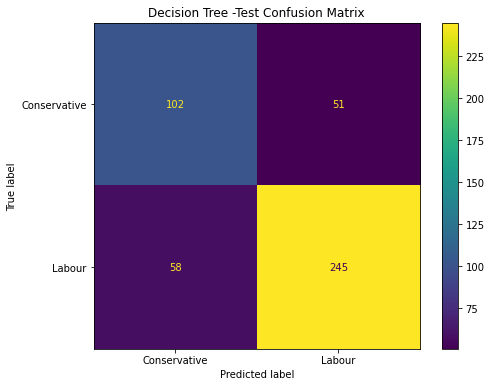

In [133]:
print(classification_report(y_test, DT_test_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(DT_model, X_test, y_test, ax = ax);
plt.title('Decision Tree -Test Confusion Matrix')

Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

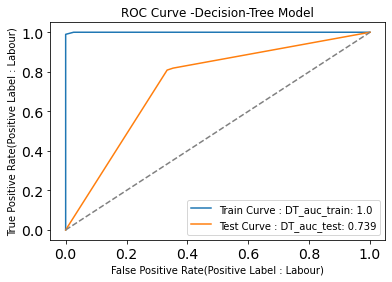

In [134]:
DT_pred_train_prob = DT_model.predict_proba(X_train)
DT_pred_test_prob = DT_model.predict_proba(X_test)

DT_auc_train = roc_auc_score(y_train,DT_pred_train_prob[:,1])
DT_auc_test = roc_auc_score(y_test,DT_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(DT_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : DT_auc_train: '+str(round(DT_auc_train,3)));
plot_roc_curve(DT_model, X_test, y_test, ax=ax,
              label = 'Test Curve : DT_auc_test: '+ str(round(DT_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -Decision-Tree Model')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)


**Bagging on Naive Bays Classifier**

In [135]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
#RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

Bagging_model=BaggingClassifier(base_estimator=NB_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=GaussianNB(), n_estimators=100, random_state=1)

**Training Performance**

In [136]:
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score_Labour = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Labour')
Bagging_train_recall_score_Conservative = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Conservative')
print(Bagging_train_score,Bagging_train_recall_score_Conservative, Bagging_train_recall_score_Labour)

0.8350612629594723 0.6872964169381107 0.8952254641909815


**Confusion Matrx- Train Bagging with Naive Bays**

              precision    recall  f1-score   support

Conservative       0.73      0.69      0.71       307
      Labour       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



Text(0.5, 1.0, 'Confusion Matrx- Train Bagging with Naive Bays')

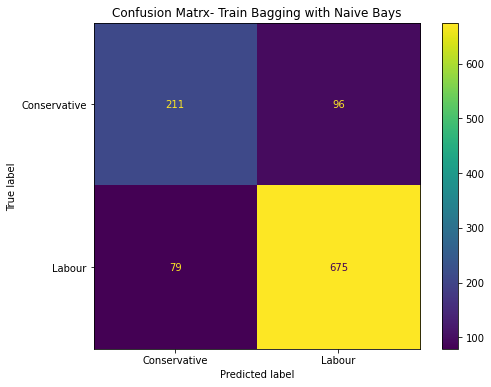

In [137]:
print(classification_report(y_train, Bagging_train_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(Bagging_model,X_train, y_train,ax=ax);
plt.title('Confusion Matrx- Train Bagging with Naive Bays')

**Test Performance**

In [138]:
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score_Labour = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Labour')
Bagging_test_recall_score_Conservative = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Conservative')
                                                
print(Bagging_test_score,Bagging_test_recall_score_Conservative, Bagging_test_recall_score_Labour)

0.8223684210526315 0.7254901960784313 0.8712871287128713


**Confusion Matrx- Test Bagging with Naive Bays**

              precision    recall  f1-score   support

Conservative       0.74      0.73      0.73       153
      Labour       0.86      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 1.0, 'Confusion Matrx- Test Bagging with Naive Bays')

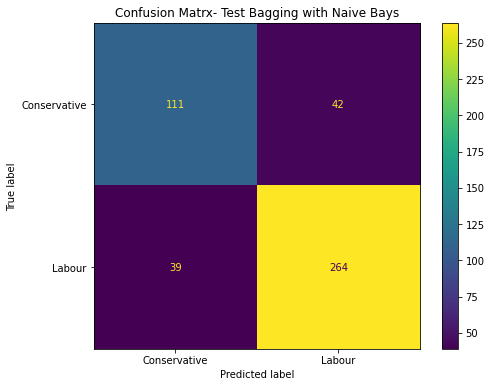

In [139]:
print(classification_report(y_test, Bagging_test_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(Bagging_model,X_test,y_test, ax=ax);
plt.title('Confusion Matrx- Test Bagging with Naive Bays')

Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

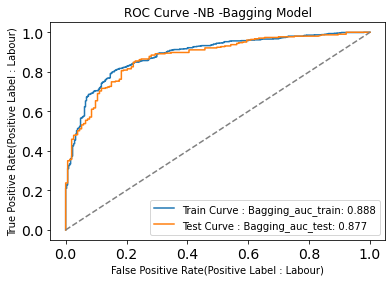

In [140]:
Bagging_pred_train_prob = Bagging_model.predict_proba(X_train)
Bagging_pred_test_prob = Bagging_model.predict_proba(X_test)

Bagging_auc_train = roc_auc_score(y_train,Bagging_pred_train_prob[:,1])
Bagging_auc_test = roc_auc_score(y_test,Bagging_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(Bagging_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : Bagging_auc_train: '+str(round(Bagging_auc_train,3)));
plot_roc_curve(Bagging_model, X_test, y_test, ax=ax,
              label = 'Test Curve : Bagging_auc_test: '+ str(round(Bagging_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -NB -Bagging Model')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**Random Forest**

In [141]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

**Training Performance of Random Forest**

In [142]:
RF_train_predict = RF_model.predict(X_train)
RF_train_score =RF_model.score(X_train, y_train)
RF_train_recall_score_Labour = recall_score(y_train,RF_train_predict,labels=None,pos_label = 'Labour')
RF_train_recall_score_Conservative = recall_score(y_train,RF_train_predict,labels=None,pos_label = 'Conservative')
print(RF_train_score,RF_train_recall_score_Conservative,RF_train_recall_score_Labour)

0.9924599434495759 0.9837133550488599 0.9960212201591512


**RF-Train Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.99      0.98      0.99       307
      Labour       0.99      1.00      0.99       754

    accuracy                           0.99      1061
   macro avg       0.99      0.99      0.99      1061
weighted avg       0.99      0.99      0.99      1061



Text(0.5, 1.0, 'RF-Train Confusion Matrix')

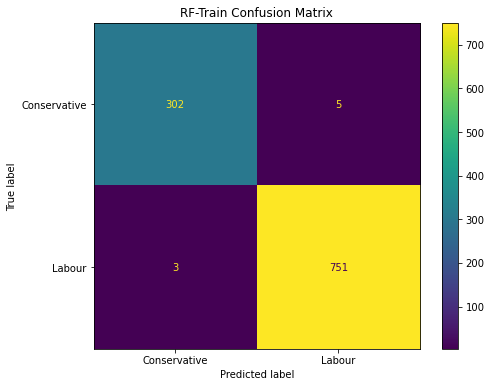

In [143]:
print(classification_report(y_train, RF_train_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(RF_model, X_train,y_train, ax = ax);
plt.title('RF-Train Confusion Matrix')

**Test Performace of Random Forest**

In [144]:
RF_test_predict = RF_model.predict(X_test)
RF_test_score = RF_model.score(X_test, y_test)
RF_test_recall_score_Labour = recall_score(y_test, RF_test_predict,labels=None,pos_label = 'Labour')
RF_test_recall_score_Conservative = recall_score(y_test, RF_test_predict,labels=None,pos_label = 'Conservative')
print(RF_test_score,RF_test_recall_score_Conservative,RF_test_recall_score_Labour)

0.8114035087719298 0.6405228758169934 0.8976897689768977


**RF-Test Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.76      0.64      0.70       153
      Labour       0.83      0.90      0.86       303

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



Text(0.5, 1.0, 'RF-Test Confusion Matrix')

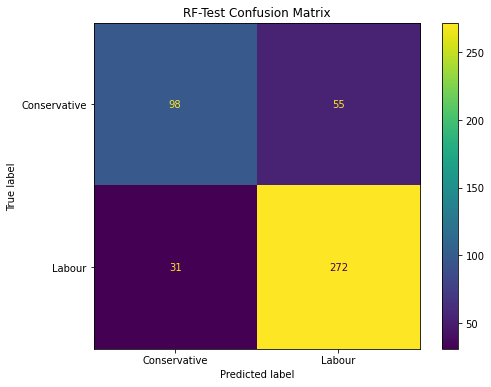

In [145]:
print(classification_report(y_test, RF_test_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(RF_model,X_test,y_test, ax = ax);
plt.title('RF-Test Confusion Matrix')

**Bagging**

In [146]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)

Bagging_model=BaggingClassifier(base_estimator=RF_model,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(random_state=1),
                  n_estimators=100, random_state=1)

**Training Performance of Bagging Test -Random forest Model**

In [147]:
Bagging_train_predict = Bagging_model.predict(X_train)
Bagging_train_score =Bagging_model.score(X_train, y_train)
Bagging_train_recall_score_Labour = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Labour')
Bagging_train_recall_score_Conservative = recall_score(y_train,Bagging_train_predict,labels=None,pos_label = 'Conservative')
print(Bagging_train_score,Bagging_train_recall_score_Conservative, Bagging_train_recall_score_Labour)

0.9613572101790764 0.8859934853420195 0.9920424403183024


**Confusiuon Matrix Bagging -Random forest Model**

              precision    recall  f1-score   support

Conservative       0.98      0.89      0.93       307
      Labour       0.96      0.99      0.97       754

    accuracy                           0.96      1061
   macro avg       0.97      0.94      0.95      1061
weighted avg       0.96      0.96      0.96      1061



Text(0.5, 1.0, 'Confusiuon Matrix Bagging -Random forest Model')

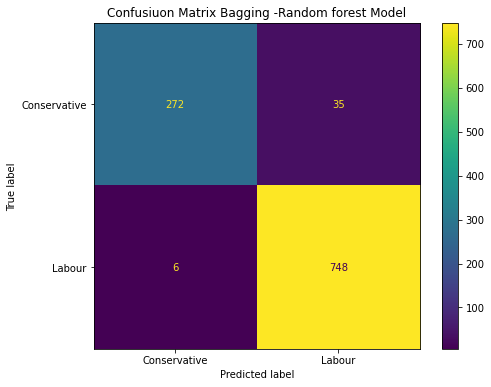

In [148]:
print(classification_report(y_train, Bagging_train_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(Bagging_model,X_train, y_train, ax = ax);
plt.title('Confusiuon Matrix Bagging -Random forest Model')

**Test Performance of Bagging Test -Random forest Model**

In [149]:
Bagging_test_predict = Bagging_model.predict(X_test)
Bagging_test_score = Bagging_model.score(X_test, y_test)
Bagging_test_recall_score_Labour = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Labour')
Bagging_test_recall_score_Conservative = recall_score(y_test, Bagging_test_predict,labels=None,pos_label = 'Conservative')
print(Bagging_test_score,Bagging_test_recall_score_Conservative, Bagging_test_recall_score_Labour)

0.8289473684210527 0.673202614379085 0.9075907590759076


**Confusiuon Matrix Bagging  Test -Random forest Model**

              precision    recall  f1-score   support

Conservative       0.79      0.67      0.73       153
      Labour       0.85      0.91      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.79      0.80       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 1.0, 'Confusiuon Matrix Bagging  Test -Random forest Model')

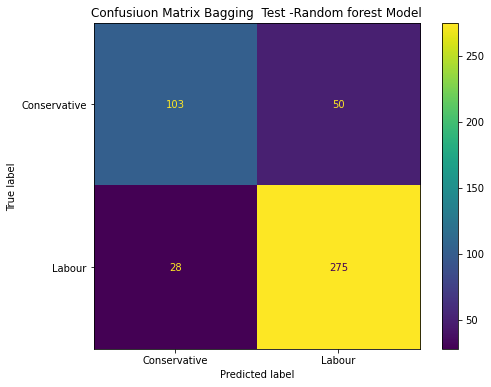

In [150]:
print(classification_report(y_test, Bagging_test_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(Bagging_model,X_test,y_test, ax = ax);
plt.title('Confusiuon Matrix Bagging  Test -Random forest Model')

Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

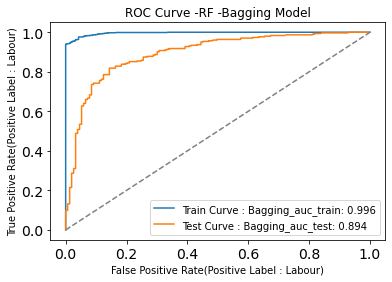

In [151]:
Bagging_pred_train_prob = Bagging_model.predict_proba(X_train)
Bagging_pred_test_prob = Bagging_model.predict_proba(X_test)

Bagging_auc_train = roc_auc_score(y_train,Bagging_pred_train_prob[:,1])
Bagging_auc_test = roc_auc_score(y_test,Bagging_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(Bagging_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : Bagging_auc_train: '+str(round(Bagging_auc_train,3)));
plot_roc_curve(Bagging_model, X_test, y_test, ax=ax,
              label = 'Test Curve : Bagging_auc_test: '+ str(round(Bagging_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -RF -Bagging Model')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)


**Ada Boost**

In [152]:
from sklearn.ensemble import AdaBoostClassifier
ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

**Training Performance of Adaboost**

In [153]:
ADB_train_predict = ADB_model.predict(X_train)
ADB_train_score = ADB_model.score(X_train, y_train)
ADB_train_recall_score_Labour = recall_score(y_train,ADB_train_predict,labels=None,pos_label='Labour')
ADB_train_recall_score_Conservative = recall_score(y_train,ADB_train_predict,labels=None,pos_label='Conservative')
print(ADB_train_score,ADB_train_recall_score_Conservative,ADB_train_recall_score_Labour)

0.8407163053722903 0.6807817589576547 0.9058355437665783


**Adaboost Classifier -Train Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.75      0.68      0.71       307
      Labour       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.84      0.84      0.84      1061



Text(0.5, 1.0, 'Adaboost Classifier -Train Confusion Matrix')

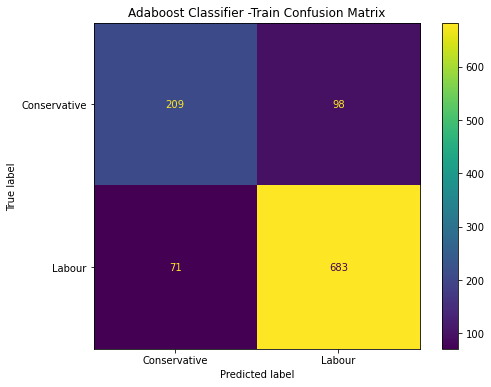

In [154]:
print(classification_report(y_train, ADB_train_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(ADB_model,X_train,y_train, ax = ax);
plt.title('Adaboost Classifier -Train Confusion Matrix')

**Test Performance of Adaboost**

In [155]:
ADB_test_predict = ADB_model.predict(X_test)
ADB_test_score = ADB_model.score(X_test, y_test)
ADB_test_recall_score_Labour = recall_score(y_test,ADB_test_predict,labels=None,pos_label='Labour')
ADB_test_recall_score_Conservative = recall_score(y_test,ADB_test_predict,labels=None,pos_label='Conservative')
print(ADB_test_score,ADB_test_recall_score_Conservative,ADB_test_recall_score_Labour)

0.8223684210526315 0.6928104575163399 0.8877887788778878


**Adaboost Classifier -Test Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.76      0.69      0.72       153
      Labour       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



Text(0.5, 1.0, 'Adaboost Classifier -Test Confusion Matrix')

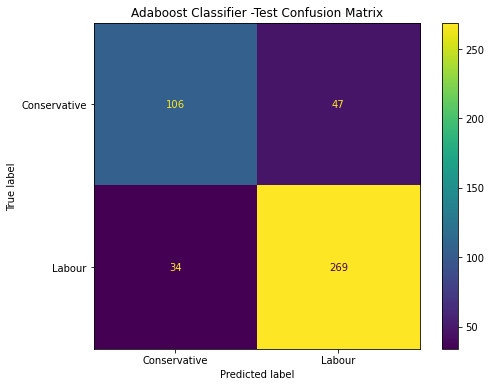

In [156]:
print(classification_report(y_test, ADB_test_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(ADB_model,X_test,y_test, ax = ax);
plt.title('Adaboost Classifier -Test Confusion Matrix')

Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

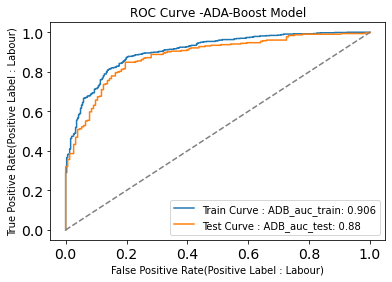

In [157]:
ADB_pred_train_prob = ADB_model.predict_proba(X_train)
ADB_pred_test_prob = ADB_model.predict_proba(X_test)

ADB_auc_train = roc_auc_score(y_train,ADB_pred_train_prob[:,1])
ADB_auc_test = roc_auc_score(y_test,ADB_pred_test_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(ADB_model, X_train,y_train,ax=ax, 
               label = 'Train Curve : ADB_auc_train: '+str(round(ADB_auc_train,3)));
plot_roc_curve(ADB_model, X_test, y_test, ax=ax,
              label = 'Test Curve : ADB_auc_test: '+ str(round(ADB_auc_test,3)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC Curve -ADA-Boost Model')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**Gradient Boosting**

In [158]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

**Training Performance of Gradient Boosting**

In [159]:
gbcl_train_predict = gbcl.predict(X_train)
gbcl_train_score = gbcl.score(X_train, y_train)
gbcl_train_recall_score_Labour = recall_score(y_train,gbcl_train_predict,labels=None,pos_label = 'Labour')
gbcl_train_recall_score_Conservative = recall_score(y_train,gbcl_train_predict,labels=None,pos_label = 'Conservative')
print(gbcl_train_score,gbcl_train_recall_score_Conservative,gbcl_train_recall_score_Labour)

0.8868991517436381 0.7719869706840391 0.9336870026525199


**Gredient Boost -Train-Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.83      0.77      0.80       307
      Labour       0.91      0.93      0.92       754

    accuracy                           0.89      1061
   macro avg       0.87      0.85      0.86      1061
weighted avg       0.89      0.89      0.89      1061



Text(0.5, 1.0, 'Gredient Boost -Train-Confusion Matrix')

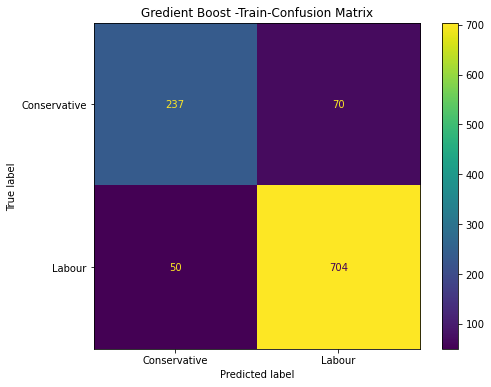

In [160]:
print(classification_report(y_train, gbcl_train_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(gbcl,X_train,y_train, ax = ax);
plt.title('Gredient Boost -Train-Confusion Matrix')

**Test Performance of Gradient Boosting**

In [161]:
gbcl_test_predict = gbcl.predict(X_test)
gbcl_test_score = gbcl.score(X_test, y_test)
gbcl_test_recall_score_Labour = recall_score(y_test, gbcl_test_predict,labels=None,pos_label = 'Labour')
gbcl_test_recall_score_Conservative = recall_score(y_test, gbcl_test_predict,labels=None,pos_label = 'Conservative')
print(gbcl_test_score,gbcl_test_recall_score_Conservative,gbcl_test_recall_score_Labour)

0.831140350877193 0.6862745098039216 0.9042904290429042


**Gredient Boost -Test-Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.78      0.69      0.73       153
      Labour       0.85      0.90      0.88       303

    accuracy                           0.83       456
   macro avg       0.82      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



Text(0.5, 1.0, 'Gredient Boost -Test-Confusion Matrix')

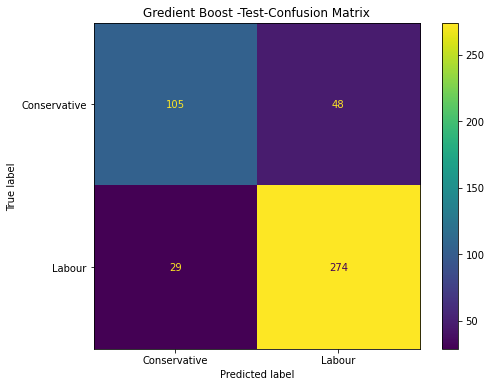

In [162]:
print(classification_report(y_test, gbcl_test_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(gbcl,X_test,y_test, ax = ax);
plt.title('Gredient Boost -Test-Confusion Matrix')

Text(0, 0.5, 'True Positive Rate(Positive Label : Labour)')

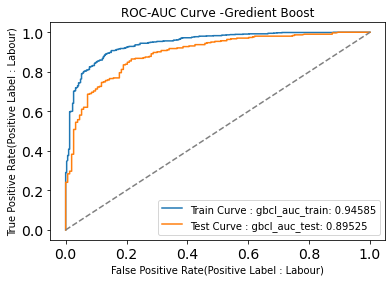

In [163]:
gbcl_train_predict_prob = gbcl.predict_proba(X_train)
gbcl_test_predict_prob = gbcl.predict_proba(X_test)

gbcl_auc_train = roc_auc_score(y_train,gbcl_train_predict_prob[:,1])
gbcl_auc_test = roc_auc_score(y_test,gbcl_test_predict_prob[:,1])

fig,ax = plt.subplots()
plot_roc_curve(gbcl, X_train,y_train,ax=ax, 
               label = 'Train Curve : gbcl_auc_train: '+str(round(gbcl_auc_train,5)));
plot_roc_curve(gbcl, X_test, y_test, ax=ax,
              label = 'Test Curve : gbcl_auc_test: '+ str(round(gbcl_auc_test,5)));
plt.plot([0,1],[0,1], linestyle='--', color = 'grey');
plt.title('ROC-AUC Curve -Gredient Boost')
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);
plt.xlabel('False Positive Rate(Positive Label : Labour)', fontsize = 10)
plt.ylabel('True Positive Rate(Positive Label : Labour)', fontsize = 10)

**Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner. Describe on which model is best/optimized**

**Comparison of Different Models**

In [164]:
model_names = ['Naive-Bayes','Logistic Regression','LDA','ADABoost',
              'Gradient Boost','KNN','DecisionTree',
              'Random Forest','Bagging']

train_recalls = [NB_train_recall_score_Labour,LR_train_recall_score_Labour,LDA_train_recall_score_Labour,
                 ADB_train_recall_score_Labour,gbcl_train_recall_score_Labour,KNN_train_recall_score_Labour,
                 DT_train_recall_score_Labour,RF_train_recall_score_Labour,
                 Bagging_train_recall_score_Labour]

test_recalls = [NB_test_recall_score_Labour,LR_test_recall_score_Labour,LDA_test_recall_score_Labour,
                ADB_test_recall_score_Labour,gbcl_test_recall_score_Labour,KNN_test_recall_score_Labour,
                DT_test_recall_score_Labour,RF_test_recall_score_Labour,Bagging_test_recall_score_Labour]

Accuracy_Train = [NB_train_score,LR_train_score,LDA_train_score,
                ADB_train_score,gbcl_train_score,
                KNN_train_score,DT_train_score,
                RF_train_score,
                 Bagging_train_score]
Accuracy_Test = [NB_test_score,LR_test_score,LDA_test_score,
                ADB_test_score,gbcl_test_score,
                KNN_test_score,DT_test_score,
                RF_test_score,
                 Bagging_test_score]

recall_df = pd.DataFrame({'Train Recall':train_recalls,
                         'Test Recall':test_recalls,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)
recall_df

,Train Recall,Test Recall,Accuracy Train,Accuracy Test
Naive-Bayes,0.893899,0.867987,0.836004,0.820175
Logistic Regression,0.909814,0.884488,0.830349,0.831140
LDA,0.907162,0.894389,0.833176,0.837719
ADABoost,0.905836,0.887789,0.840716,0.822368
Gradient Boost,0.933687,0.904290,0.886899,0.831140
KNN,0.901857,0.907591,0.838831,0.831140
DecisionTree,0.989390,0.808581,0.992460,0.760965
Random Forest,0.996021,0.897690,0.992460,0.811404
Bagging,0.992042,0.907591,0.961357,0.828947


* As per the test data, best performing model is - Linear Discriminant Analysis
* Best Performing models are - Decision Tree , Random Forest and Bagging
* However these best performing models are overfitted (test-train diff. is more than 10)

**Conclusion**

**Models which have performed approximately similar on the train and test data set and apply SMOTE on the same to check if the performance improves or not eg. Naive Bayes and KNN (train slightly greater than test)**

**SMOTE**

In [165]:
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

In [166]:
sm = SMOTE(random_state=2)

In [167]:
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [168]:
y_train.value_counts()

Labour          754
Conservative    307
Name: vote, dtype: int64

In [169]:
y_train_res.value_counts()

Conservative    754
Labour          754
Name: vote, dtype: int64

In [170]:
X_train.shape, X_train_res.shape

((1061, 8), (1508, 8))

**Naive Bayes with SMOTE**

In [171]:
NB_SM_model = GaussianNB()
NB_SM_model.fit(X_train_res, y_train_res)

GaussianNB()

**Training Performance**

In [172]:
NBSM_train_predict = NB_SM_model.predict(X_train_res)
NBSM_train_score = NB_SM_model.score(X_train_res, y_train_res)
NBSM_train_recall_score_Labour = recall_score(y_train_res,NBSM_train_predict,labels=None,pos_label='Labour')
NBSM_train_recall_score_Conservative = recall_score(y_train_res,NBSM_train_predict,labels=None,pos_label='Conservative')
print(NBSM_train_score, NBSM_train_recall_score_Conservative, NBSM_train_recall_score_Labour)

0.8342175066312998 0.8381962864721485 0.830238726790451


**Naive Bayes with SMOTE -Train-Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.83      0.84      0.83       754
      Labour       0.84      0.83      0.83       754

    accuracy                           0.83      1508
   macro avg       0.83      0.83      0.83      1508
weighted avg       0.83      0.83      0.83      1508



Text(0.5, 1.0, 'Naive Bayes with SMOTE -Train-Confusion Matrix')

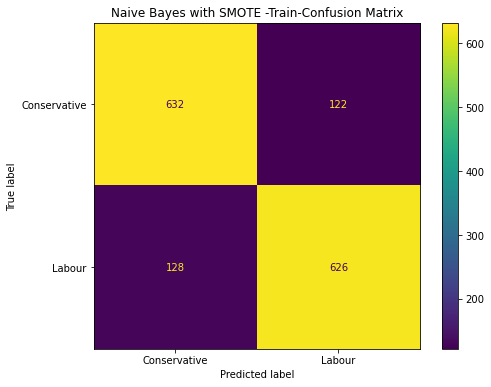

In [173]:
print(classification_report(y_train_res ,NBSM_train_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(NB_SM_model,X_train_res,y_train_res,ax = ax);
plt.title('Naive Bayes with SMOTE -Train-Confusion Matrix')

**Test Performance**

In [174]:
NBSM_test_predict = NB_SM_model.predict(X_test)
NBSM_test_score = NB_SM_model.score(X_test, y_test)
NBSM_test_recall_score_Labour = recall_score(y_test,NBSM_test_predict,labels=None,pos_label='Labour')
NBSM_test_recall_score_Conservative = recall_score(y_test,NBSM_test_predict,labels=None,pos_label='Conservative')
print(NBSM_test_score, NBSM_test_recall_score_Conservative, NBSM_test_recall_score_Labour)

0.8026315789473685 0.7843137254901961 0.8118811881188119


**Naive Bayes with SMOTE -Test-Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.68      0.78      0.73       153
      Labour       0.88      0.81      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.81      0.80      0.81       456



Text(0.5, 1.0, 'Naive Bayes with SMOTE -Test-Confusion Matrix')

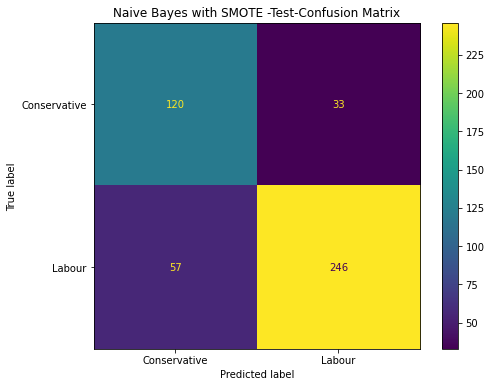

In [175]:
print(classification_report(y_test, NBSM_test_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(NB_SM_model,X_test,y_test,ax = ax);
plt.title('Naive Bayes with SMOTE -Test-Confusion Matrix')

**KNN With SMOTE**

In [176]:
from sklearn.neighbors import KNeighborsClassifier

KNN_SM_model=KNeighborsClassifier()
KNN_SM_model.fit(X_train_res,y_train_res)

KNeighborsClassifier()

**Training Performance**

In [177]:
KNN_SM_train_predict = KNN_SM_model.predict(X_train_res)
KNN_SM_train_score = KNN_SM_model.score(X_train_res, y_train_res)
KNN_SM_train_recall_score_Labour = recall_score(y_train_res,KNN_SM_train_predict,labels=None,pos_label='Labour')
KNN_SM_train_recall_score_Conservative = recall_score(y_train_res,KNN_SM_train_predict,labels=None,pos_label='Conservative')
print(KNN_SM_train_score, KNN_SM_train_recall_score_Conservative,KNN_SM_train_recall_score_Labour)

0.8885941644562334 0.9456233421750663 0.8315649867374005


**KNN with SMOTE -Train-Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.85      0.95      0.89       754
      Labour       0.94      0.83      0.88       754

    accuracy                           0.89      1508
   macro avg       0.89      0.89      0.89      1508
weighted avg       0.89      0.89      0.89      1508



Text(0.5, 1.0, 'KNN with SMOTE -Train-Confusion Matrix')

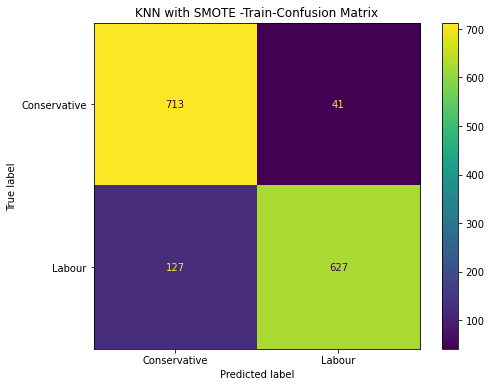

In [178]:
print(classification_report(y_train_res, KNN_SM_train_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(KNN_SM_model,X_train_res,y_train_res, ax = ax);
plt.title('KNN with SMOTE -Train-Confusion Matrix')

**Test Performance**

In [179]:
KNN_SM_test_predict = KNN_SM_model.predict(X_test)
KNN_SM_test_score = KNN_SM_model.score(X_test, y_test)
KNN_SM_test_recall_score_Labour = recall_score(y_test,KNN_SM_test_predict,labels=None,pos_label='Labour')
KNN_SM_test_recall_score_Conservative = recall_score(y_test,KNN_SM_test_predict,labels=None,pos_label='Conservative')
print(KNN_SM_test_score, KNN_SM_test_recall_score_Conservative, KNN_SM_test_recall_score_Labour)

0.8048245614035088 0.7843137254901961 0.8151815181518152


**KNN with SMOTE -Test-Confusion Matrix**

              precision    recall  f1-score   support

Conservative       0.68      0.78      0.73       153
      Labour       0.88      0.82      0.85       303

    accuracy                           0.80       456
   macro avg       0.78      0.80      0.79       456
weighted avg       0.81      0.80      0.81       456



Text(0.5, 1.0, 'KNN with SMOTE -Test-Confusion Matrix')

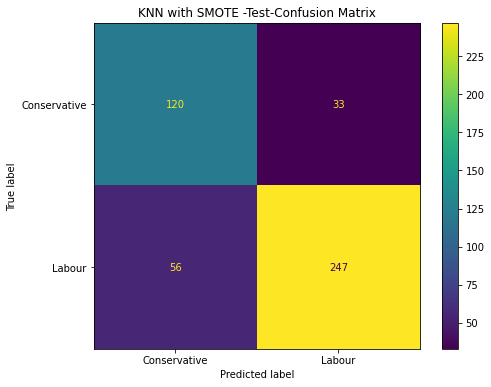

In [180]:
print(classification_report(y_test, KNN_SM_test_predict))
fig, ax = plt.subplots(figsize = (8,6))
plot_confusion_matrix(KNN_SM_model,X_test,y_test, ax = ax);
plt.title('KNN with SMOTE -Test-Confusion Matrix')

**Conclusion after SMOTE**

* Recall for Naive Bayes decresed significantly.
* Huge Difference between the train and test dataset Recall value,Accuracy for KNN

In [181]:
model_names = ['Naive-Bayes SMOTE','KNN SMOTE']


Accuracy_Train = [NBSM_train_score,
                KNN_SM_train_score]
Accuracy_Test = [NBSM_test_score,
                KNN_SM_test_score]

recall_df1 = pd.DataFrame({'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)
recall_df1

,Accuracy Train,Accuracy Test
Naive-Bayes SMOTE,0.834218,0.802632
KNN SMOTE,0.888594,0.804825


In [182]:
model_names = ['Naive-Bayes SMOTE','Logistic Regression','LDA','ADABoost',
              'Gradient Boost','KNN SMOTE','DecisionTree',
              'Random Forest','Bagging']

train_recalls = [NBSM_train_recall_score_Labour,LR_train_recall_score_Labour,LDA_train_recall_score_Labour,
                ADB_train_recall_score_Labour,gbcl_train_recall_score_Labour,
                KNN_SM_train_recall_score_Labour,DT_train_recall_score_Labour,
                RF_train_recall_score_Labour,
               Bagging_train_recall_score_Labour]

test_recalls = [NBSM_test_recall_score_Labour,LR_test_recall_score_Labour,LDA_test_recall_score_Labour,
               ADB_test_recall_score_Labour,gbcl_test_recall_score_Labour,
               KNN_SM_test_recall_score_Labour,DT_test_recall_score_Labour,
               RF_test_recall_score_Labour,Bagging_test_recall_score_Labour]

Accuracy_Train = [NBSM_train_score,LR_train_score,LDA_train_score,
                ADB_train_score,gbcl_train_score,
                KNN_SM_train_score,DT_train_score,
                RF_train_score,
                 Bagging_train_score]

Accuracy_Test = [NBSM_test_score,LR_test_score,LDA_test_score,
                ADB_test_score,gbcl_test_score,
                KNN_SM_test_score,DT_test_score,
                RF_test_score,
                 Bagging_test_score]

recall_df = pd.DataFrame({'Train Recall':train_recalls,
                        'Test Recall':test_recalls,'Accuracy Train':Accuracy_Train,'Accuracy Test':Accuracy_Test},
                        index=model_names)

recall_df

,Train Recall,Test Recall,Accuracy Train,Accuracy Test
Naive-Bayes SMOTE,0.830239,0.811881,0.834218,0.802632
Logistic Regression,0.909814,0.884488,0.830349,0.831140
LDA,0.907162,0.894389,0.833176,0.837719
ADABoost,0.905836,0.887789,0.840716,0.822368
Gradient Boost,0.933687,0.904290,0.886899,0.831140
KNN SMOTE,0.831565,0.815182,0.888594,0.804825
DecisionTree,0.989390,0.808581,0.992460,0.760965
Random Forest,0.996021,0.897690,0.992460,0.811404
Bagging,0.992042,0.907591,0.961357,0.828947


In [183]:
sdf = recall_df.copy()
sdf.drop(['Train Recall','Test Recall'], axis = 1, inplace = True)
var = sdf.index
sdf['Variables'] = var

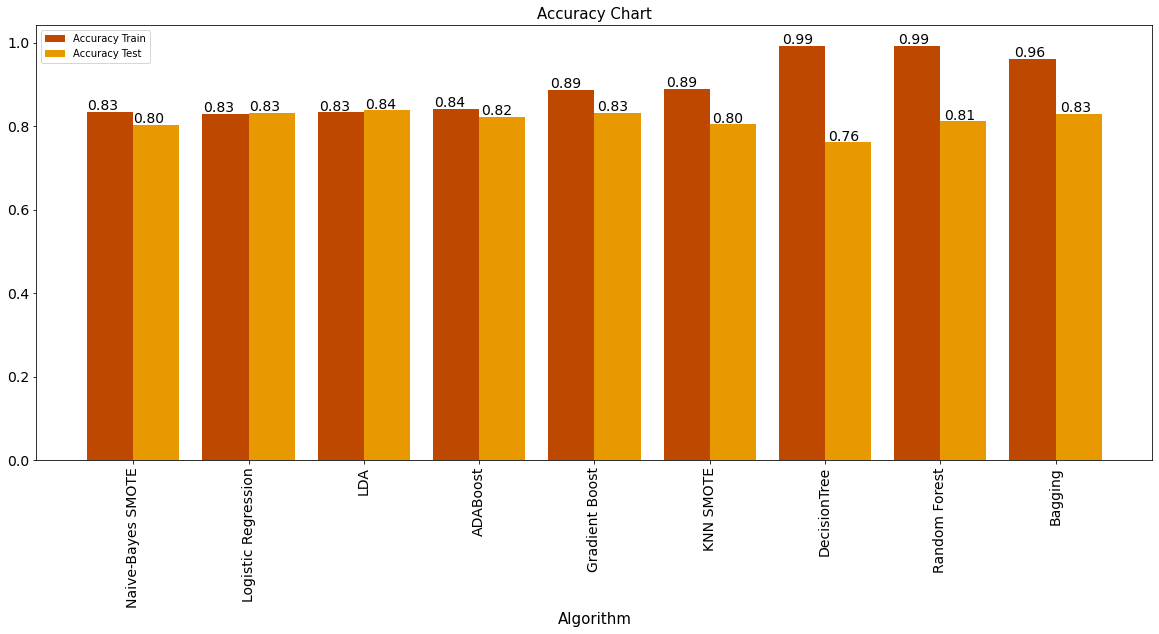

In [184]:
variables = sdf['Variables']
x = np.arange(len(variables))
fig, ax = plt.subplots(figsize = (20,8))
# The width of the bars (1 = the whole width of the 'year group')
width = 0.4

# Create the bar charts!

ax.bar(x - width/2, sdf['Accuracy Train'], width, label='Accuracy Train', color='#bf4800')
ax.bar(x + width/2, sdf['Accuracy Test'], width, label='Accuracy Test', color='#e99900')

for p in ax.patches:
    ax.annotate("%.2f"% p.get_height(), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize = 14)

ax.set_xticks(x)    # This ensures we have one tick per year, otherwise we get fewer
ax.set_xticklabels(variables.astype(str).values, fontsize = 10)


plt. yticks(np.arange(0,1.1, step=0.2))
plt.title('Accuracy Chart', fontsize = 15)
plt.xlabel('Algorithm', fontsize = 15)
plt.xticks(fontsize = 14, rotation = 90);
plt.yticks(fontsize = 14);

ax.legend()
plt.show()

**Cross Validation on Naive Bayes Model**

**Accuracy scores across all iterations of 10 fold cv**

In [185]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(NB_SM_model, X_train_res, y_train_res, cv=10)
scores 

array([0.78145695, 0.82119205, 0.82781457, 0.78807947, 0.88741722,
       0.8410596 , 0.82119205, 0.86754967, 0.80666667, 0.86      ])

**Recall scores across all iterations of 10 fold cv**

In [186]:
rec_scores = cross_val_score(NB_SM_model,X_train_res,y_train_res, cv=10,
                            scoring='accuracy')
rec_scores 

array([0.78145695, 0.82119205, 0.82781457, 0.78807947, 0.88741722,
       0.8410596 , 0.82119205, 0.86754967, 0.80666667, 0.86      ])

**Average recall score across all iterations of 10 fold cv**

In [187]:
rec_scores.mean() 

0.830242825607064

* After 10 fold cross validation, scores both on  data set a for all 10 folds are almost same. 
* Hence our model is valid.

# Problem 2:

In [188]:
import nltk
import re
import wordcloud
from nltk.corpus import inaugural

**Making of a dataframe of the three speeches**

In [189]:
index = ['1941-Roosevelt','1961-Kennedy','1973-Nixon']
inaugural_speech=pd.DataFrame({'president':['Roosevelt(1941)','Kennedy(1961)','Nixon(1973)'],
                               'text':[inaugural.raw('1941-Roosevelt.txt'),
                                       inaugural.raw('1961-Kennedy.txt'),
                                       inaugural.raw('1973-Nixon.txt')]},index=index)

In [190]:
inaugural_speech

,president,text
1941-Roosevelt,Roosevelt(1941),On each national day of inauguration since 178...
1961-Kennedy,Kennedy(1961),"Vice President Johnson, Mr. Speaker, Mr. Chief..."
1973-Nixon,Nixon(1973),"Mr. Vice President, Mr. Speaker, Mr. Chief Jus..."


****2.1 Find the number of characters, words and sentences for the mentioned documents****

**Number of characters**

In [191]:
inaugural_speech['char_count'] = inaugural_speech['text'].str.len() ## this also includes spaces
inaugural_speech

,president,text,char_count
1941-Roosevelt,Roosevelt(1941),On each national day of inauguration since 178...,7571
1961-Kennedy,Kennedy(1961),"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618
1973-Nixon,Nixon(1973),"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991


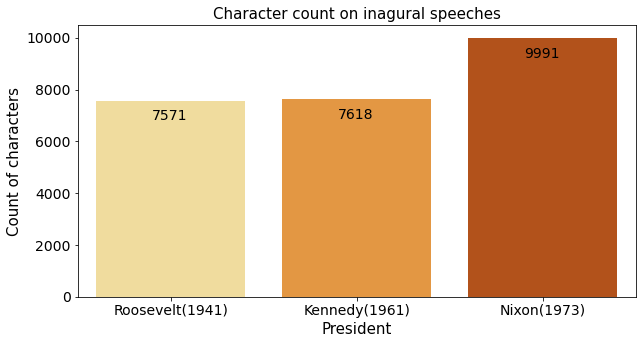

In [192]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y='char_count', x='president', data=inaugural_speech, palette = 'YlOrBr')
plt.title('Character count on inagural speeches', fontsize=15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.xlabel('President', fontsize=15)
plt.ylabel('Count of characters', fontsize=15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-750), fontsize = 14)

**Number of words**

In [193]:
inaugural_speech['word_count'] = inaugural_speech['text'].apply(lambda x: len(str(x).split(" ")))
inaugural_speech

,president,text,char_count,word_count
1941-Roosevelt,Roosevelt(1941),On each national day of inauguration since 178...,7571,1323
1961-Kennedy,Kennedy(1961),"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364
1973-Nixon,Nixon(1973),"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769


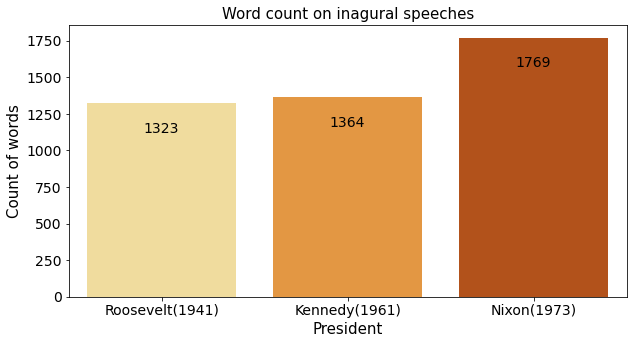

In [194]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y='word_count', x='president', data=inaugural_speech, palette = 'YlOrBr')
plt.title('Word count on inagural speeches', fontsize=15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.xlabel('President', fontsize=15)
plt.ylabel('Count of words', fontsize=15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.3,
                     p.get_height()-200), fontsize = 14)

**Number of sentences**

In [195]:
from nltk.tokenize import sent_tokenize
inaugural_speech['sents_count'] = inaugural_speech['text'].apply(lambda x: len(sent_tokenize(x)))
inaugural_speech

,president,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt(1941),On each national day of inauguration since 178...,7571,1323,68
1961-Kennedy,Kennedy(1961),"Vice President Johnson, Mr. Speaker, Mr. Chief...",7618,1364,52
1973-Nixon,Nixon(1973),"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",9991,1769,68


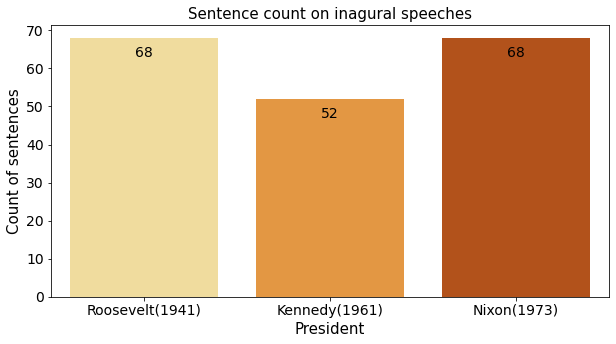

In [196]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y='sents_count', x='president', data=inaugural_speech, palette = 'YlOrBr')
plt.title('Sentence count on inagural speeches', fontsize=15)
plt.xlabel('President', fontsize=15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.ylabel('Count of sentences', fontsize=15)
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()),
                    (p.get_x()+.35,
                     p.get_height()-5), fontsize = 14)

**2.2 Remove all the stopwords from the three speeches**

* Lower case conversion for all words

In [197]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson, mr. speaker, mr. chief...
1973-Nixon        mr. vice president, mr. speaker, mr. chief jus...
Name: text, dtype: object

* Remove punctuation

In [198]:
inaugural_speech['text'] = inaugural_speech['text'].str.replace('[^\w\s]','')
inaugural_speech['text']

1941-Roosevelt    on each national day of inauguration since 178...
1961-Kennedy      vice president johnson mr speaker mr chief jus...
1973-Nixon        mr vice president mr speaker mr chief justice ...
Name: text, dtype: object

In [199]:
from nltk.corpus import stopwords

In [200]:
stop_words = stopwords.words('english')
add_to_stop_words = ['mr','on','it','the','in','let','to','us','shall'] #add these to the stop words
stop_words.extend(add_to_stop_words)
stop_words=set(stop_words)

* Remove the stop words from the three speeches

In [201]:
inaugural_speech['text'] = inaugural_speech['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_words))
inaugural_speech

,president,text,char_count,word_count,sents_count
1941-Roosevelt,Roosevelt(1941),national day inauguration since 1789 people re...,7571,1323,68
1961-Kennedy,Kennedy(1961),vice president johnson speaker chief justice p...,7618,1364,52
1973-Nixon,Nixon(1973),vice president speaker chief justice senator c...,9991,1769,68


**Print the three speeches after stop words removal**

In [202]:
list(inaugural_speech[inaugural_speech['president']=="Roosevelt(1941)"].text)

['national day inauguration since 1789 people renewed sense dedication united states washingtons day task people create weld together nation lincolns day task people preserve nation disruption within day task people save nation institutions disruption without come time midst swift happenings pause moment take stock recall place history rediscover may risk real peril inaction lives nations determined count years lifetime human spirit life man threescore years ten little little less life nation fullness measure live men doubt men believe democracy form government frame life limited measured kind mystical artificial fate unexplained reason tyranny slavery become surging wave future freedom ebbing tide americans know true eight years ago life republic seemed frozen fatalistic terror proved true midst shock acted acted quickly boldly decisively later years living years fruitful years people democracy brought greater security hope better understanding lifes ideals measured material things vi

In [203]:
list(inaugural_speech[inaugural_speech['president']=="Kennedy(1961)"].text)

['vice president johnson speaker chief justice president eisenhower vice president nixon president truman reverend clergy fellow citizens observe today victory party celebration freedom symbolizing end well beginning signifying renewal well change sworn almighty god solemn oath forebears l prescribed nearly century three quarters ago world different man holds mortal hands power abolish forms human poverty forms human life yet revolutionary beliefs forebears fought still issue around globe belief rights man come generosity state hand god dare forget today heirs first revolution word go forth time place friend foe alike torch passed new generation americans born century tempered war disciplined hard bitter peace proud ancient heritage unwilling witness permit slow undoing human rights nation always committed committed today home around world every nation know whether wishes well ill pay price bear burden meet hardship support friend oppose foe order assure survival success liberty much p

In [204]:
list(inaugural_speech[inaugural_speech['president']=="Nixon(1973)"].text)

['vice president speaker chief justice senator cook mrs eisenhower fellow citizens great good country share together met four years ago america bleak spirit depressed prospect seemingly endless war abroad destructive conflict home meet today stand threshold new era peace world central question use peace resolve era enter postwar periods often time retreat isolation leads stagnation home invites new danger abroad resolve become time great responsibilities greatly borne renew spirit promise america enter third century nation past year saw farreaching results new policies peace continuing revitalize traditional friendships missions peking moscow able establish base new durable pattern relationships among nations world americas bold initiatives 1972 long remembered year greatest progress since end world war ii toward lasting peace world peace seek world flimsy peace merely interlude wars peace endure generations come important understand necessity limitations americas role maintaining peac

**2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)**

In [235]:
freq = pd.Series(' '.join(inaugural_speech.iloc[0:1,1]).split()).value_counts()[:3]
freq

nation       11
know         10
democracy     9
dtype: int64

* Plot top three words and their counts

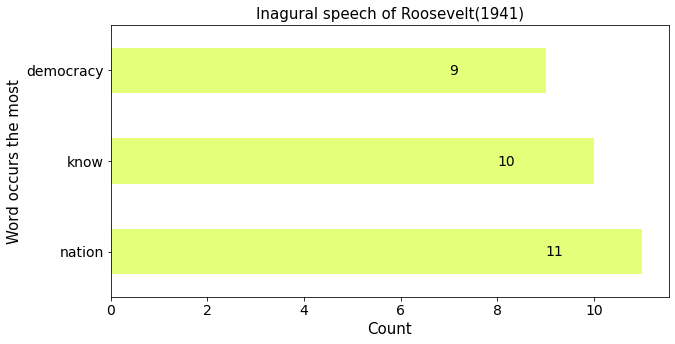

In [236]:
plt.figure(figsize=(10,5))
ax = freq.plot(kind='barh', colormap = 'Wistia')
plt.title('Inagural speech of Roosevelt(1941)', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.xlabel('Count', fontsize = 15)
plt.ylabel('Word occurs the most', fontsize = 15)
#plt.ylabel('Top words')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-2, p.get_y()+.20), fontsize=14)

In [231]:
freq = pd.Series(' '.join(inaugural_speech.iloc[1:2,1]).split()).value_counts()[:3]
freq

sides     8
world     8
pledge    7
dtype: int64

* Plot top three words and their counts

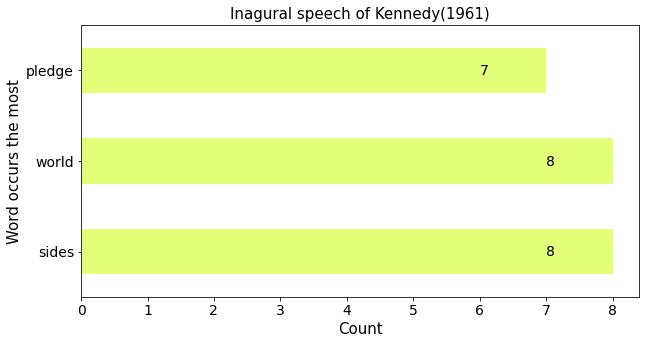

In [232]:
plt.figure(figsize=(10,5))
ax = freq.plot(kind='barh', colormap = 'Wistia')
plt.title('Inagural speech of Kennedy(1961)', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.xlabel('Count', fontsize = 15)
plt.ylabel('Word occurs the most', fontsize = 15)

#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=14)

In [237]:
freq = pd.Series(' '.join(inaugural_speech.iloc[2:3,1]).split()).value_counts()[:3]
freq

peace    19
world    16
new      15
dtype: int64

* Plot top three words and their counts

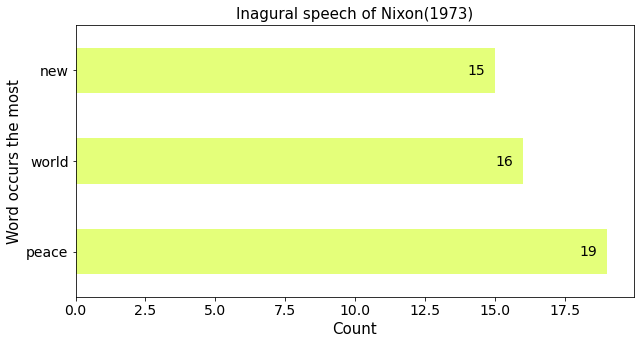

In [238]:
plt.figure(figsize=(10,5))
ax = freq.plot(kind='barh', colormap = 'Wistia')
plt.title('Inagural speech of Nixon(1973)', fontsize = 15)
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

plt.xlabel('Count', fontsize = 15)
plt.ylabel('Word occurs the most', fontsize = 15)

#plt.ylabel('Count')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_width()),
                    (p.get_width()-1, p.get_y()+.20), fontsize=14)

**2.4  Plot the word cloud of each of the three speeches. (after removing the stopwords)**

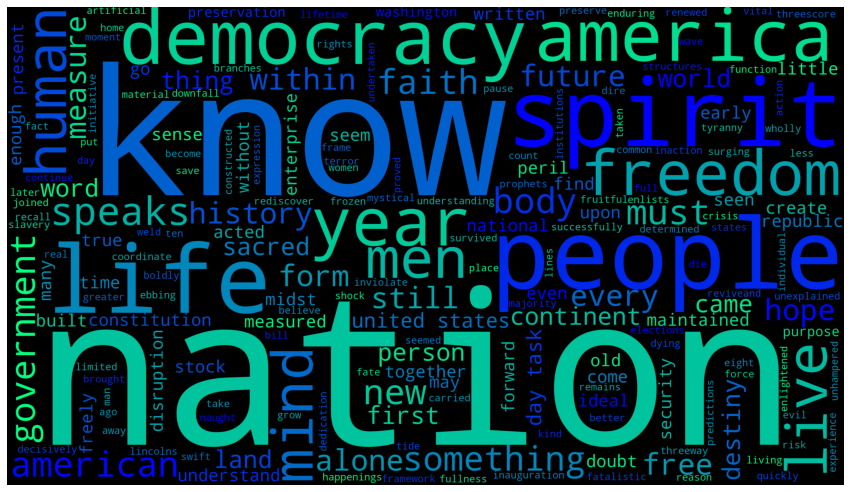

In [247]:
#import word cloud library and plot the word cloud for each speech
from wordcloud import WordCloud,STOPWORDS
words = ' '.join(inaugural_speech.iloc[0:1,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'winter',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(15, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

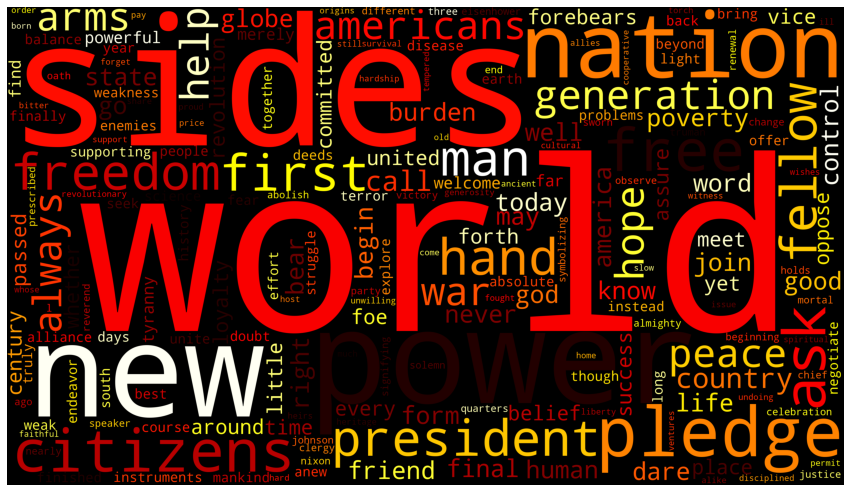

In [246]:
words = ' '.join(inaugural_speech.iloc[1:2,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'hot',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(15, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

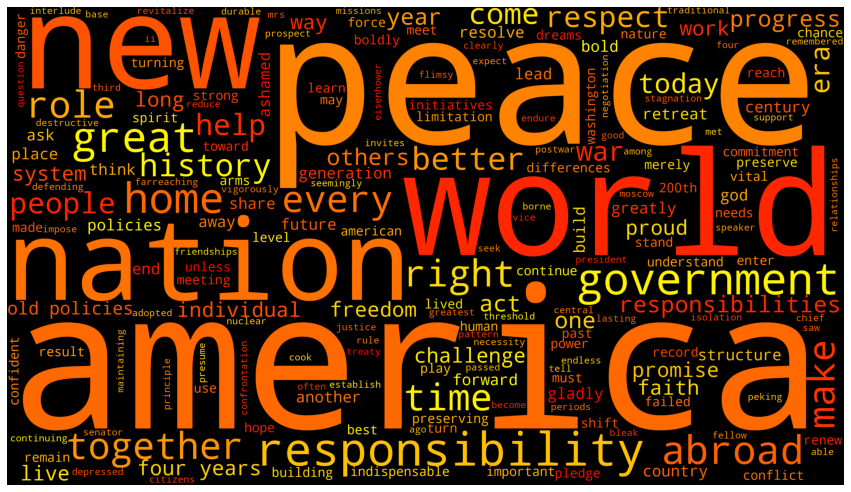

In [245]:
words = ' '.join(inaugural_speech.iloc[2:3,1])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      colormap = 'autumn',
                      width=3500,
                      height=2000
                     ).generate(words)
plt.figure(1,figsize=(15, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()